# Submission Pertama: Menyelesaikan Permasalahan Human Resources

## Pengumpulan Data

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, precision_score,
                            recall_score, f1_score)

import warnings
warnings.filterwarnings('ignore')

### Menyiapkan data yang akan digunakan

In [ ]:
df = pd.read_csv("employee_data.csv")
df.head()

EmployeeId  Age  Attrition     BusinessTravel  DailyRate  \
0           1   38        NaN  Travel_Frequently       1444   
1           2   37        1.0      Travel_Rarely       1141   
2           3   51        1.0      Travel_Rarely       1323   
3           4   42        0.0  Travel_Frequently        555   
4           5   40        NaN      Travel_Rarely       1194   

               Department  DistanceFromHome  Education EducationField  \
0         Human Resources                 1          4          Other   
1  Research & Development                11          2        Medical   
2  Research & Development                 4          4  Life Sciences   
3                   Sales                26          3      Marketing   
4  Research & Development                 2          4        Medical   

   EmployeeCount  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  \
0              1                        4    Male          88               3   
1              1                        1  Female          61               1   
2              1                        1    Male          34               3   
3              1                        3  Female          77               3   
4              1                        3  Female          98               3   

   JobLevel                    JobRole  JobSatisfaction MaritalStatus  \
0         1            Human Resources                2       Married   
1         2  Healthcare Representative                2       Married   
2         1         Research Scientist                3       Married   
3         4            Sales Executive                2       Married   
4         1         Research Scientist                3       Married   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  \
0           2991         5224                   0      Y      Yes   
1           4777        14382                   5      Y       No   
2           2461        10332                   9      Y      Yes   
3          13525        14864                   5      Y       No   
4           2001        12549                   2      Y       No   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         2   
1                 15                  3                         1   
2                 12                  3                         3   
3                 14                  3                         4   
4                 14                  3                         2   

   StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0             80                 1                  7                      2   
1             80                 0                 15                      2   
2             80                 3                 18                      2   
3             80                 1                 23                      2   
4             80                 3                 20                      2   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                3               6                   2   
1                1               1                   0   
2                4              10                   0   
3                4              20                   4   
4                3               5                   3   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        1                     2  
1                        0                     0  
2                        2                     7  
3                        4                     8  
4                        0                     2

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.isnull().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
dtype: int64

In [ ]:
df['Attrition'].value_counts(dropna=False)

Attrition
0.0    879
NaN    412
1.0    179
Name: count, dtype: int64

In [ ]:
# Menghapus baris NaN pada var Attrition dalam dataframe baru yang digunakan sebagai dataset pemodelan
dataset = df.dropna(subset=['Attrition'], axis=0)
dataset.head()

EmployeeId  Age  Attrition     BusinessTravel  DailyRate  \
1           2   37        1.0      Travel_Rarely       1141   
2           3   51        1.0      Travel_Rarely       1323   
3           4   42        0.0  Travel_Frequently        555   
6           7   40        0.0      Travel_Rarely       1124   
7           8   55        1.0      Travel_Rarely        725   

               Department  DistanceFromHome  Education EducationField  \
1  Research & Development                11          2        Medical   
2  Research & Development                 4          4  Life Sciences   
3                   Sales                26          3      Marketing   
6                   Sales                 1          2        Medical   
7  Research & Development                 2          3        Medical   

   EmployeeCount  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  \
1              1                        1  Female          61               1   
2              1                        1    Male          34               3   
3              1                        3  Female          77               3   
6              1                        2    Male          57               1   
7              1                        4    Male          78               3   

   JobLevel                    JobRole  JobSatisfaction MaritalStatus  \
1         2  Healthcare Representative                2       Married   
2         1         Research Scientist                3       Married   
3         4            Sales Executive                2       Married   
6         2            Sales Executive                4       Married   
7         5                    Manager                1       Married   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  \
1           4777        14382                   5      Y       No   
2           2461        10332                   9      Y      Yes   
3          13525        14864                   5      Y       No   
6           7457        13273                   2      Y      Yes   
7          19859        21199                   5      Y      Yes   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
1                 15                  3                         1   
2                 12                  3                         3   
3                 14                  3                         4   
6                 22                  4                         3   
7                 13                  3                         4   

   StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1             80                 0                 15                      2   
2             80                 3                 18                      2   
3             80                 1                 23                      2   
6             80                 3                  6                      2   
7             80                 1                 24                      2   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
1                1               1                   0   
2                4              10                   0   
3                4              20                   4   
6                2               4                   3   
7                3               5                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
1                        0                     0  
2                        2                     7  
3                        4                     8  
6                        0                     2  
7                        1                     4

In [ ]:
dataset.shape # Jumlah baris dan kolom dataset

(1058, 35)

In [ ]:
# Mengumpulkan baris NaN pada var Attrition dalam dataframe baru yang digunakan sebagai dataset prediksi
predict_df = df.loc[df['Attrition'].isnull()]
predict_df.head()

EmployeeId  Age  Attrition     BusinessTravel  DailyRate  \
0            1   38        NaN  Travel_Frequently       1444   
4            5   40        NaN      Travel_Rarely       1194   
5            6   29        NaN      Travel_Rarely        352   
12          13   47        NaN      Travel_Rarely        571   
18          19   25        NaN  Travel_Frequently        772   

                Department  DistanceFromHome  Education EducationField  \
0          Human Resources                 1          4          Other   
4   Research & Development                 2          4        Medical   
5          Human Resources                 6          1        Medical   
12                   Sales                14          3        Medical   
18  Research & Development                 2          1  Life Sciences   

    EmployeeCount  EnvironmentSatisfaction  Gender  HourlyRate  \
0               1                        4    Male          88   
4               1                        3  Female          98   
5               1                        4    Male          87   
12              1                        3  Female          78   
18              1                        4    Male          77   

    JobInvolvement  JobLevel                 JobRole  JobSatisfaction  \
0                3         1         Human Resources                2   
4                3         1      Research Scientist                3   
5                2         1         Human Resources                2   
12               3         2         Sales Executive                3   
18               4         2  Manufacturing Director                3   

   MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0        Married           2991         5224                   0      Y   
4        Married           2001        12549                   2      Y   
5        Married           2804        15434                   1      Y   
12       Married           4591        24200                   3      Y   
18      Divorced           5206         4973                   1      Y   

   OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0       Yes                 11                  3                         2   
4        No                 14                  3                         2   
5        No                 11                  3                         4   
12      Yes                 17                  3                         3   
18       No                 17                  3                         3   

    StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0              80                 1                  7                      2   
4              80                 3                 20                      2   
5              80                 0                  1                      3   
12             80                 1                 11                      4   
18             80                 2                  7                      6   

    WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                 3               6                   2   
4                 3               5                   3   
5                 3               1                   0   
12                2               5                   4   
18                3               7                   7   

    YearsSinceLastPromotion  YearsWithCurrManager  
0                         1                     2  
4                         0                     2  
5                         0                     0  
12                        1                     2  
18                        0                     7

In [ ]:
predict_df.shape # Jumlah baris dan kolom dataset prediksi

(412, 35)

## Data Understanding

**Data tersebut berisi rincian demografi, metrik terkait pekerjaan, dan tanda-tanda pengurangan karyawan**


EmployeeId : Pengenal Karyawan

Attrition : Apakah karyawan tersebut mengalami pengurangan karyawan? (0=tidak, 1=ya)

Age : Usia karyawan

BusinessTravel : Komitmen perjalanan untuk pekerjaan

DailyRate : Gaji harian

Department : Departemen Karyawan

DistanceFromHome : Jarak dari kantor ke rumah (dalam km)

Education : 1-Di Bawah Perguruan Tinggi, 2-Perguruan Tinggi, 3-Sarjana, 4-Magister, 5-Doktor

EducationField : Bidang pendidikan (Human Resources, Other, Technical Degree, Marketing, Medical, Life Sciences)

EnvironmentSatisfaction : 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi

Gender : Jenis Kelamin karyawan

HourlyRate : Gaji per jam

JobInvolvement : 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi

JobLevel : Tingkat pekerjaan (1 hingga 5)

JobRole : Peran Pekerjaan

JobSatisfaction : 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi

MaritalStatus : StatusPerkawinan

MonthlyIncome : Gaji bulanan

MonthlyRate : Tingkat bulanan

NumCompaniesWorked : Jumlah perusahaan tempat bekerja

Over18 : Berusia lebih dari 18 tahun?

OverTime : Lembur? (Yes/No)

PercentSalaryHike : Persentase kenaikan gaji tahun lalu

PerformanceRating : 1-Rendah, 2-Baik, 3-Sangat Baik, 4-Luar Biasa

RelationshipSatisfaction : 1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi

StandardHours : Jam Standar

StockOptionLevel : Tingkat Opsi Saham

TotalWorkingYears : Total tahun bekerja

TrainingTimesLastYear : Jumlah pelatihan yang dihadiri tahun lalu

WorkLifeBalance : 1-Rendah, 2-Baik, 3-Sangat Baik, 4-Luar Biasa

YearsAtCompany : Tahun di Perusahaan

YearsInCurrentRole : Tahun dalam jabatan saat ini

YearsSinceLastPromotion : Tahun sejak promosi terakhir

YearsWithCurrManager : Tahun dengan manajer saat ini.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1058 non-null   int64  
 1   Age                       1058 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1058 non-null   object 
 4   DailyRate                 1058 non-null   int64  
 5   Department                1058 non-null   object 
 6   DistanceFromHome          1058 non-null   int64  
 7   Education                 1058 non-null   int64  
 8   EducationField            1058 non-null   object 
 9   EmployeeCount             1058 non-null   int64  
 10  EnvironmentSatisfaction   1058 non-null   int64  
 11  Gender                    1058 non-null   object 
 12  HourlyRate                1058 non-null   int64  
 13  JobInvolvement            1058 non-null   int64  
 14  JobLevel     

In [ ]:
# Mengubah tipe data int menjadi object
dataset[['Attrition', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', \
'JobLevel', 'JobSatisfaction', 'Over18', 'OverTime', 'PerformanceRating', 'StockOptionLevel', 'RelationshipSatisfaction', 'WorkLifeBalance']] = dataset[['Attrition', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', \
'JobLevel', 'JobSatisfaction', 'Over18', 'OverTime', 'PerformanceRating', 'StockOptionLevel', 'RelationshipSatisfaction', 'WorkLifeBalance']].astype(str)

In [ ]:
# Mengubah tipe data int menjadi object
predict_df[['Attrition', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', \
'JobLevel', 'JobSatisfaction', 'Over18', 'OverTime', 'PerformanceRating', 'StockOptionLevel', 'RelationshipSatisfaction', 'WorkLifeBalance']] = predict_df[['Attrition', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', \
'JobLevel', 'JobSatisfaction', 'Over18', 'OverTime', 'PerformanceRating', 'StockOptionLevel', 'RelationshipSatisfaction', 'WorkLifeBalance']].astype(str)

In [ ]:
dataset.describe(include='all')

EmployeeId          Age Attrition BusinessTravel    DailyRate  \
count   1058.000000  1058.000000      1058           1058  1058.000000   
unique          NaN          NaN         2              3          NaN   
top             NaN          NaN       0.0  Travel_Rarely          NaN   
freq            NaN          NaN       879            746          NaN   
mean     736.656900    37.055766       NaN            NaN   809.542533   
std      427.440538     9.410421       NaN            NaN   408.478049   
min        2.000000    18.000000       NaN            NaN   102.000000   
25%      364.250000    30.000000       NaN            NaN   465.250000   
50%      731.500000    36.000000       NaN            NaN   817.500000   
75%     1117.750000    43.000000       NaN            NaN  1168.500000   
max     1470.000000    60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome Education EducationField  \
count                     1058       1058.000000      1058           1058   
unique                       3               NaN         5              6   
top     Research & Development               NaN         3  Life Sciences   
freq                       701               NaN       410            436   
mean                       NaN          8.978261       NaN            NaN   
std                        NaN          8.040608       NaN            NaN   
min                        NaN          1.000000       NaN            NaN   
25%                        NaN          2.000000       NaN            NaN   
50%                        NaN          7.000000       NaN            NaN   
75%                        NaN         13.000000       NaN            NaN   
max                        NaN         29.000000       NaN            NaN   

        EmployeeCount EnvironmentSatisfaction Gender   HourlyRate  \
count          1058.0                    1058   1058  1058.000000   
unique            NaN                       4      2          NaN   
top               NaN                       3   Male          NaN   
freq              NaN                     335    620          NaN   
mean              1.0                     NaN    NaN    65.643667   
std               0.0                     NaN    NaN    20.324861   
min               1.0                     NaN    NaN    30.000000   
25%               1.0                     NaN    NaN    48.000000   
50%               1.0                     NaN    NaN    65.000000   
75%               1.0                     NaN    NaN    83.000000   
max               1.0                     NaN    NaN   100.000000   

       JobInvolvement JobLevel          JobRole JobSatisfaction MaritalStatus  \
count            1058     1058             1058            1058          1058   
unique              4        5                9               4             3   
top                 3        1  Sales Executive               4       Married   
freq              625      394              232             340           464   
mean              NaN      NaN              NaN             NaN           NaN   
std               NaN      NaN              NaN             NaN           NaN   
min               NaN      NaN              NaN             NaN           NaN   
25%               NaN      NaN              NaN             NaN           NaN   
50%               NaN      NaN              NaN             NaN           NaN   
75%               NaN      NaN              NaN             NaN           NaN   
max               NaN      NaN              NaN             NaN           NaN   

        MonthlyIncome   MonthlyRate  NumCompaniesWorked Over18 OverTime  \
count     1058.000000   1058.000000         1058.000000   1058     1058   
unique            NaN           NaN                 NaN      1        2   
top               NaN           NaN                 NaN      Y       No   
freq              NaN           NaN                 NaN   1058      751   
mean      6625.945

In [ ]:
# Membagi kolom menjadi kolom numerik dan kategori
var_kategori = [var for var in dataset.columns if dataset[var].dtype=='O' and var not in ['Attrition','EmployeeId']]
var_numerik = [var for var in dataset.columns if dataset[var].dtype!='O' and var not in ['Attrition','EmployeeId']]

# Melihat pemisahan variabel
print("Kategori : ",var_kategori)
print("Numerik : ",var_numerik)

Kategori :  ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
Numerik :  ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


## Data Preparation / Preprocessing

Missing value:

    Masalah ini muncul karena adanya nilai yang hilang dari sebuah data dan biasanya direpresentasikan sebagai nilai NaN dalam library pandas. Library pandas menyediakan sebuah method bernama isnull() atau isna() untuk mengidentifikasi missing value dalam sebuah DataFrame.

Invalid value:

    Masalah ini muncul ketika terdapat beberapa nilai yang tidak masuk akal, tidak sesuai dengan ketentuan, dan background knowledge dari data tersebut. Untuk mendeteksi masalah seperti ini, kita membutuhkan teknik sedikit advance. Salah satu teknik yang paling sering digunakan ialah teknik filtering data menggunakan regex.

Duplicate data:

    Terjadi ketika terdapat sebuah observasi (semua nilai dalam satu unit baris) yang memiliki nilai sama persis pada setiap kolomnya. Pandas menyediakan sebuah method duplicated() untuk mengidentifikasi adanya duplikasi pada sebuah DataFrame.

Inaccurate value:

    Masalah yang muncul ketika nilai dalam sebuah data tidak sesuai dengan hasil observasi. Masalah ini umumnya muncul karena adanya human error atau sistem error.

Inconsistent value:
    
    Inconsistent value adalah masalah yang muncul ketika sebuah data memiliki nilai yang tidak konsisten baik dari segi satuan maupun ketentuan penilaian. Inkonsistensi ini umumnya muncul karena adanya perbedaan standar dalam proses pengumpulan nilai.

Outlier:

    Titik data yang berada sangat jauh dari titik data yang lain dalam sebuah dataset. Nilai yang sangat jauh ini tentunya akan berdampak terhadap beberapa parameter statistik yang digunakan untuk menganalisis data, seperti nilai mean dan standard deviation. Terdapat beberapa metode yang dapat digunakan untuk mengidentifikasi outlier dalam sebuah dataset. Metode yang paling sering digunakan ialah IQR method.


In [ ]:
# Mengecek baris yang duplikat
duplicate = dataset[dataset.duplicated()]
duplicate

Empty DataFrame
Columns: [EmployeeId, Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

*Missing value, Invalid value, Duplicate data, Inaccurate value, Inconsistent value tidak ditemukan*

**Distribusi Variabel Kategori**

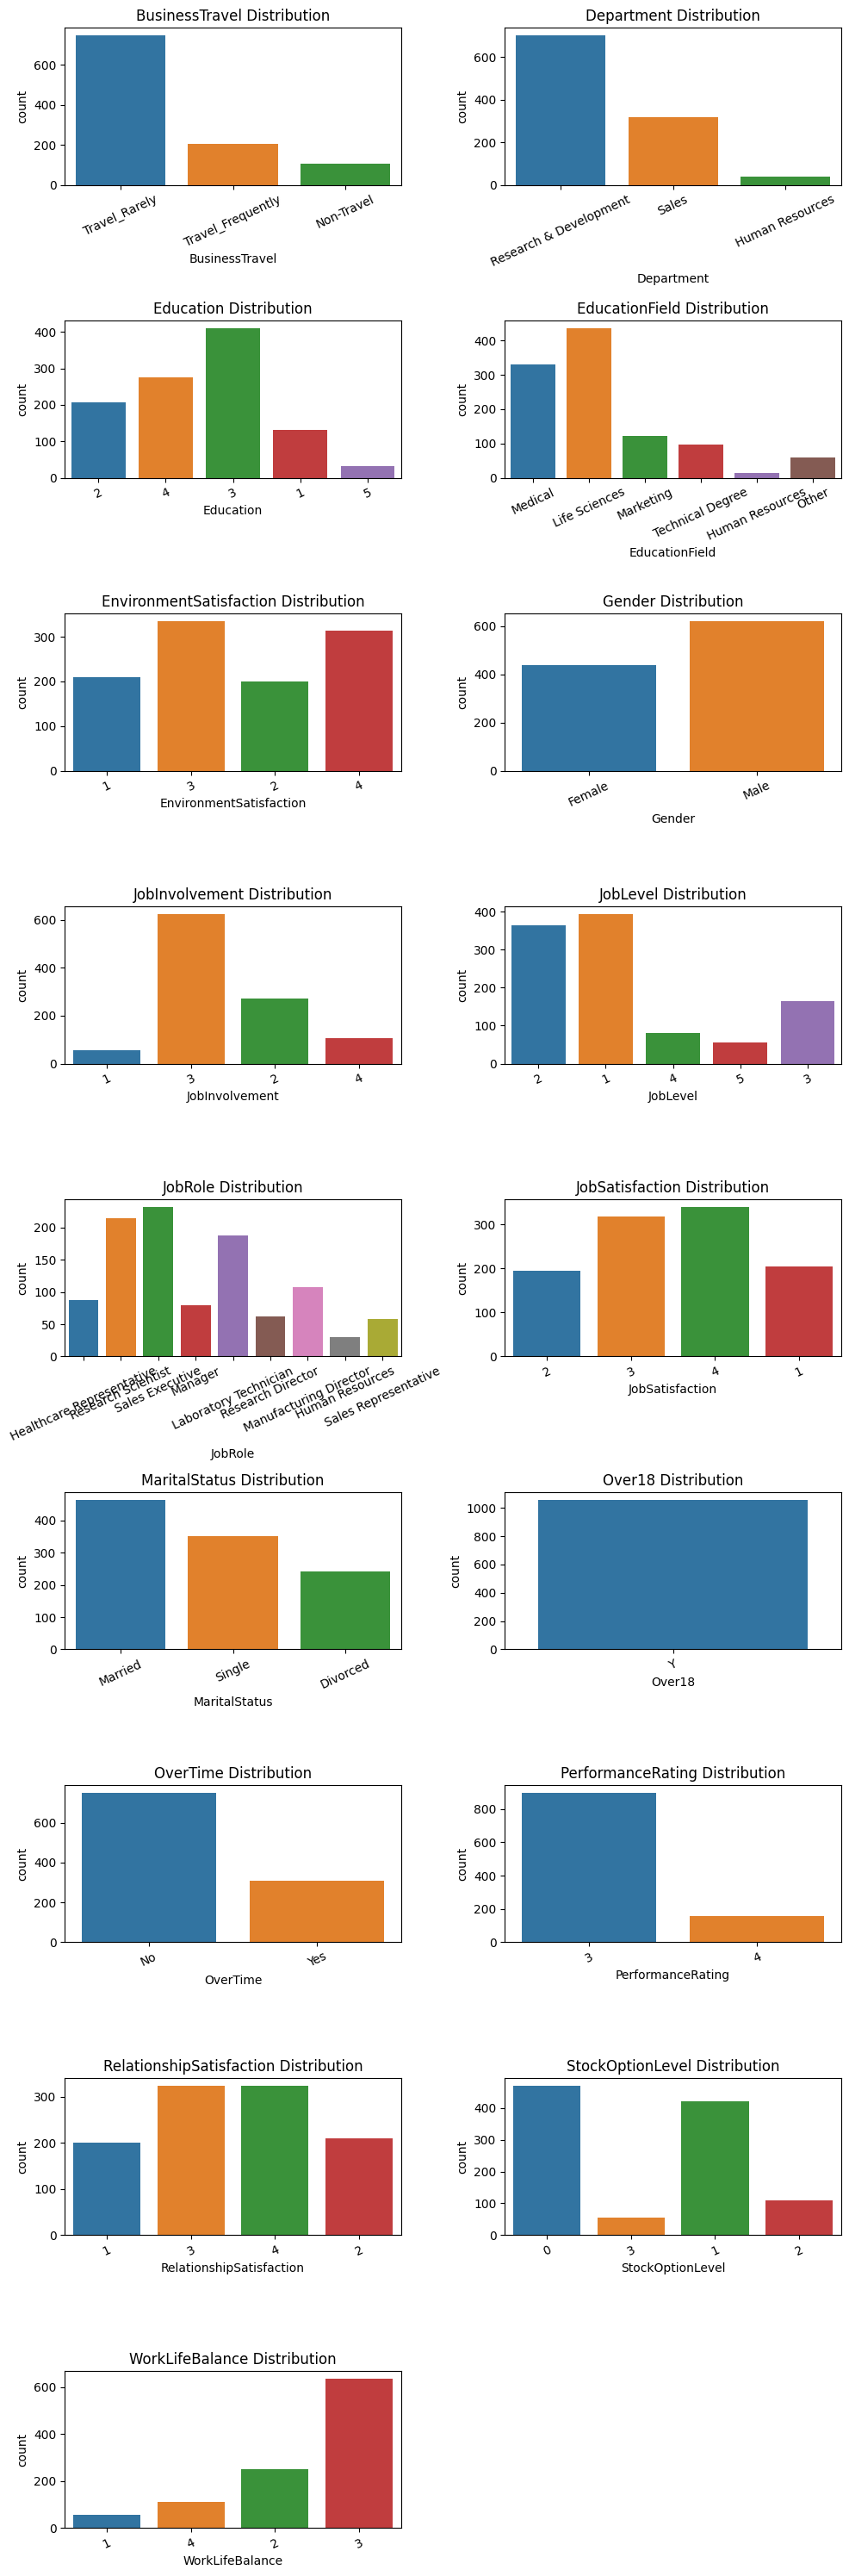

In [ ]:
# Distribusi variabel kategori dengan grafik batang
fig, axs = plt.subplots(9, 2, figsize=(10, 30))
axs = axs.flatten()
for i, col in enumerate(var_kategori):
    sns.countplot(x=col, data=dataset, ax=axs[i], hue=col)
    axs[i].tick_params(axis='x', rotation=25)
    axs[i].set_title(f"{col} Distribution")

axs[-1].axis('off')
plt.tight_layout()
plt.show()

**Distribusi Variabel Numerik**

In [ ]:
# Distribusi variabel numerik dengan histogram dan boxplot
def cek_plot(dataset, kolom):
    fig,ax = plt.subplots(1,2, figsize=(12,4))

    # Histogram
    sns.distplot(dataset[kolom], bins=30, ax=ax[0])

    # Hitung mean and median
    mean_value = dataset[kolom].mean()
    median_value = dataset[kolom].median()

    # Garis vertikal mean and median
    ax[0].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    ax[0].axvline(median_value, color='green', linestyle='-', label=f'Median: {median_value:.2f}')
    ax[0].set_title('Histogram')
    ax[0].legend()

    # Boxplot
    sns.boxplot(y=dataset[kolom], ax=ax[1])
    ax[1].set_title('Boxplot')

    # Judul utama
    fig.suptitle('Analisis variabel ' + str(kolom))

    # Menampilkan gambar
    plt.show()

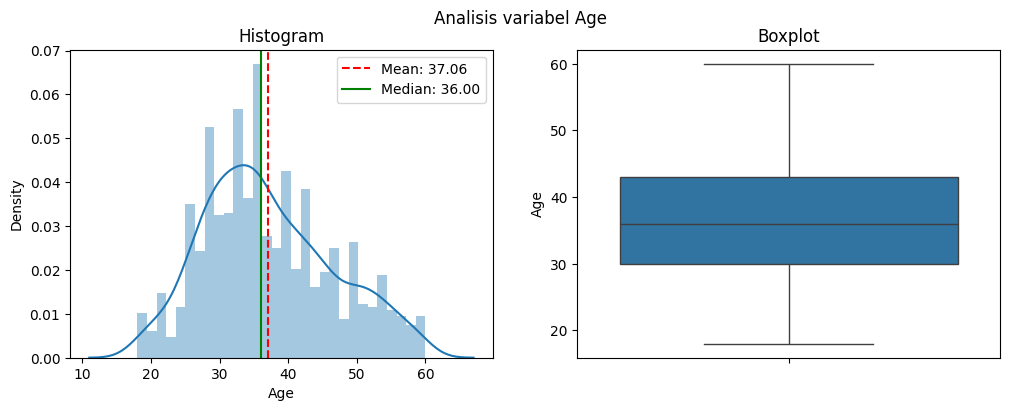

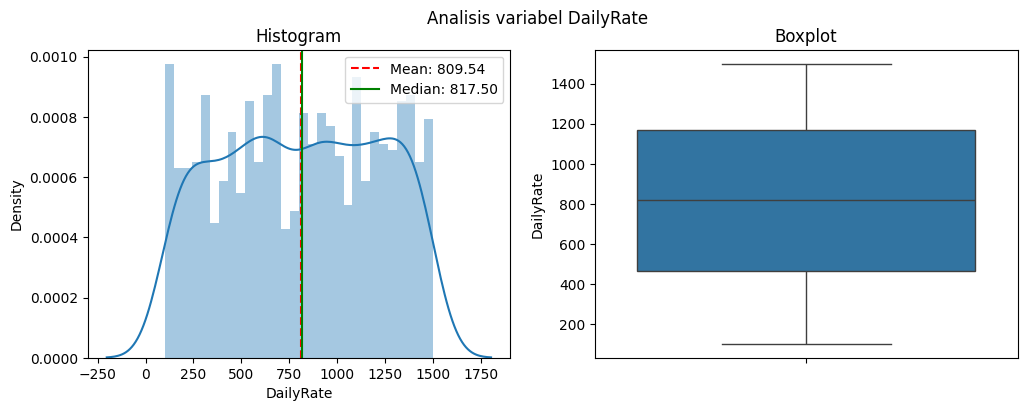

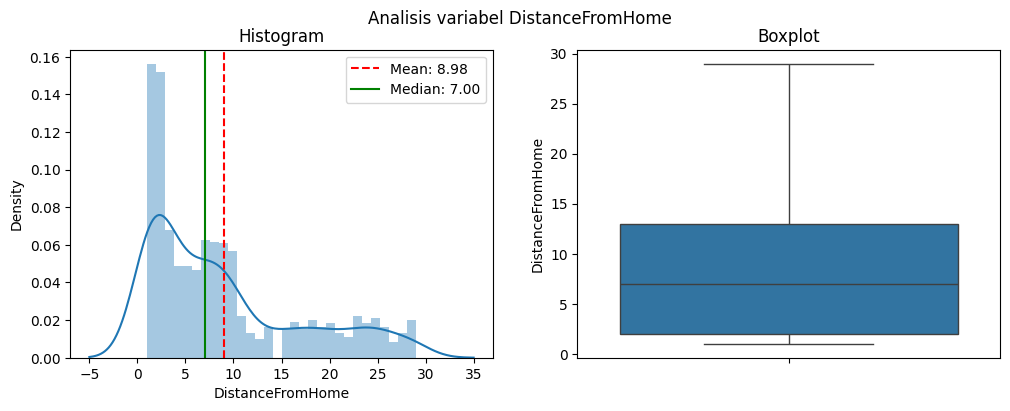

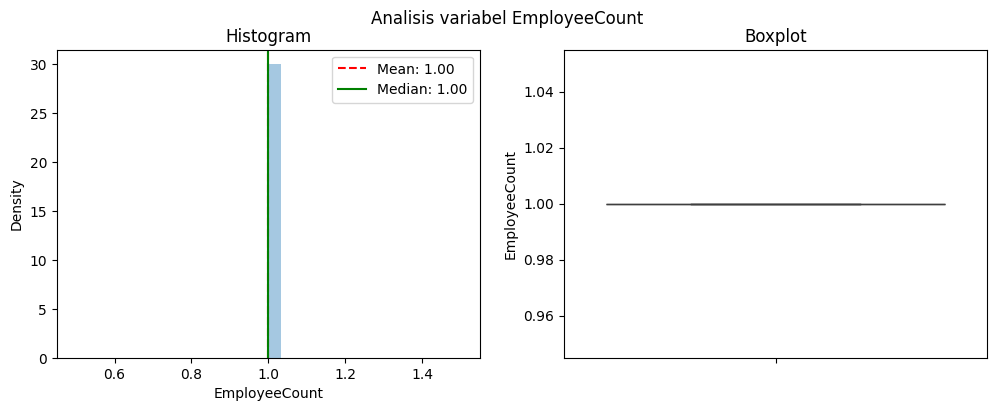

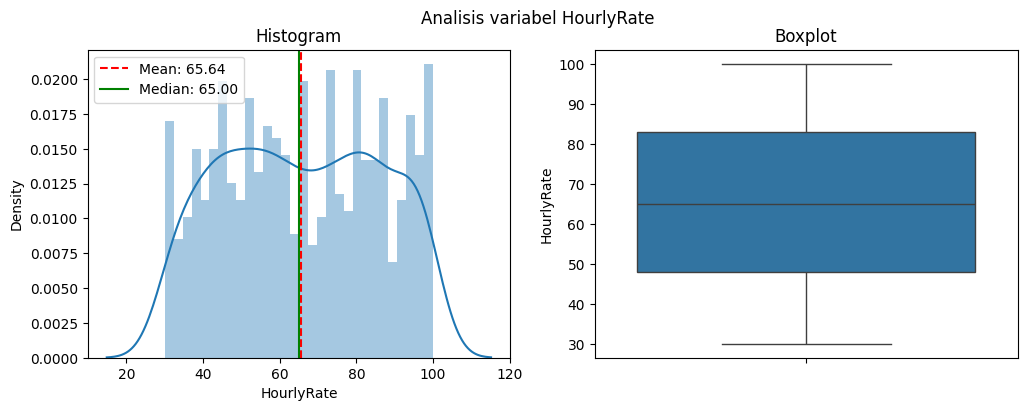

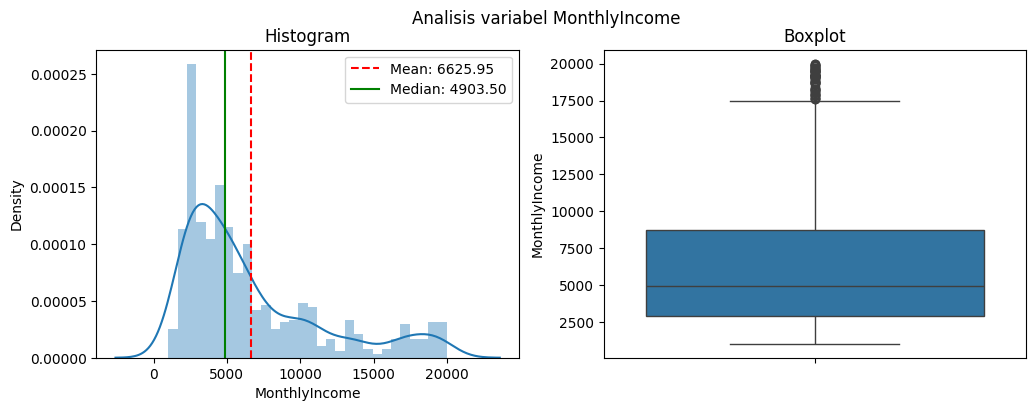

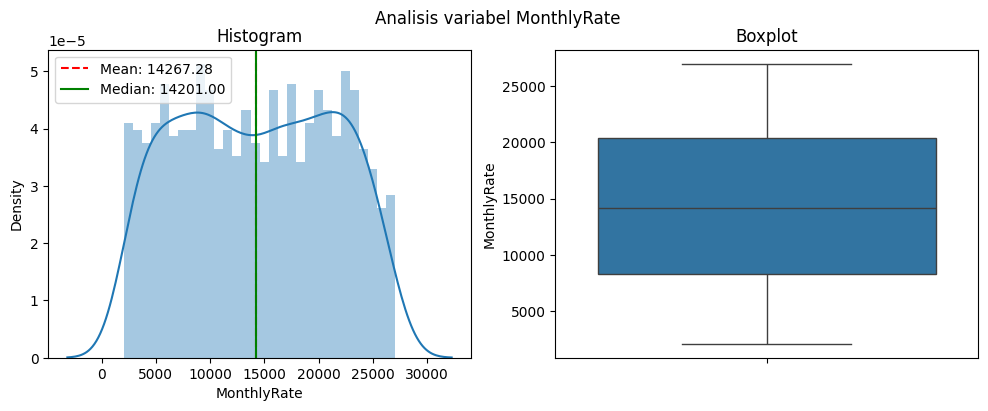

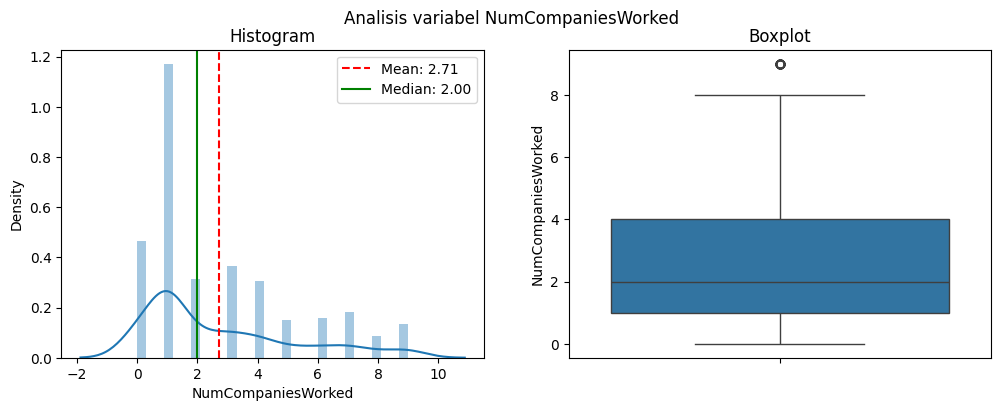

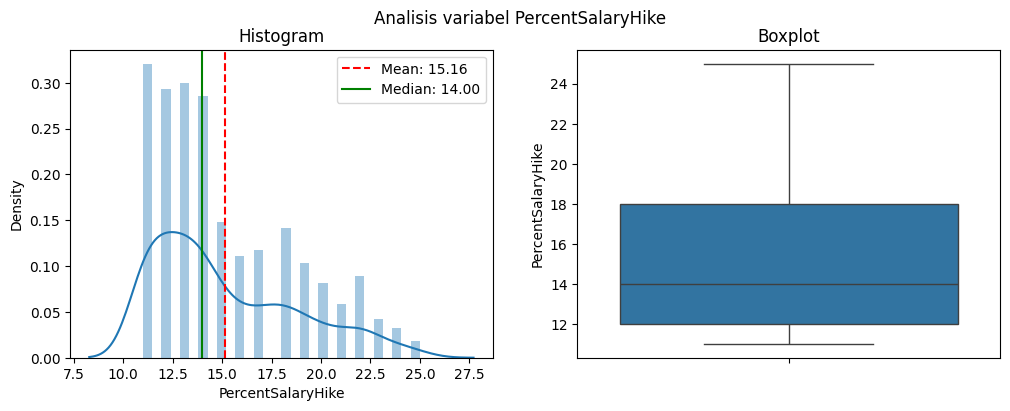

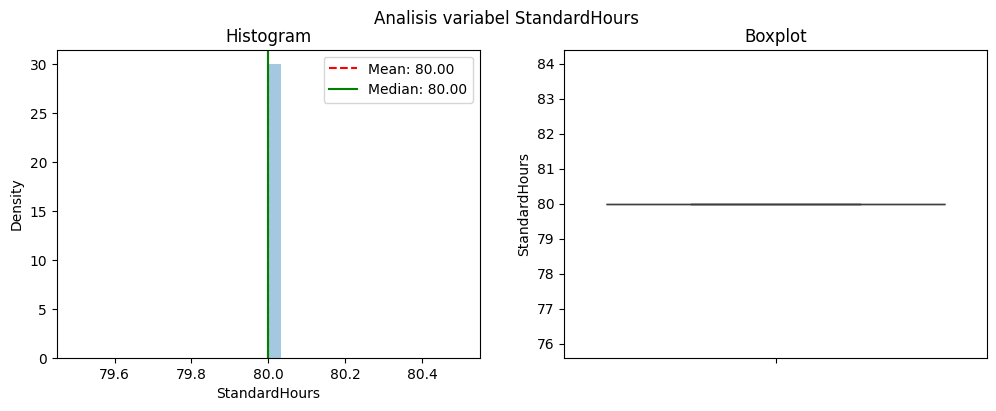

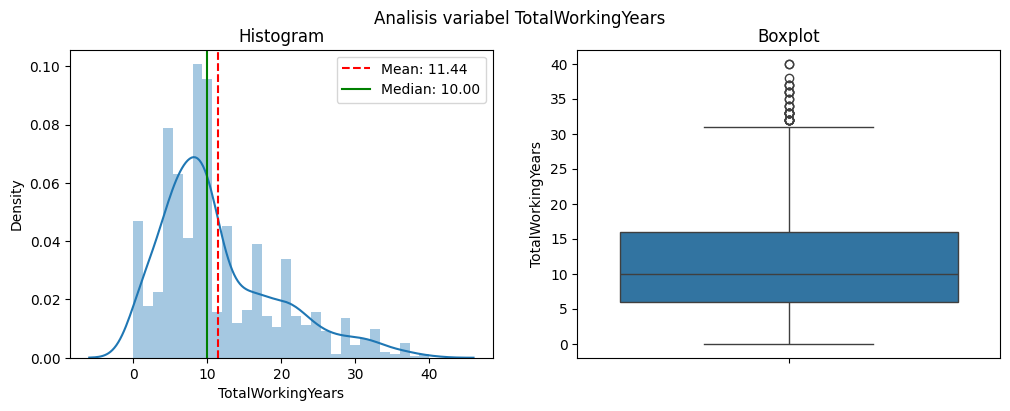

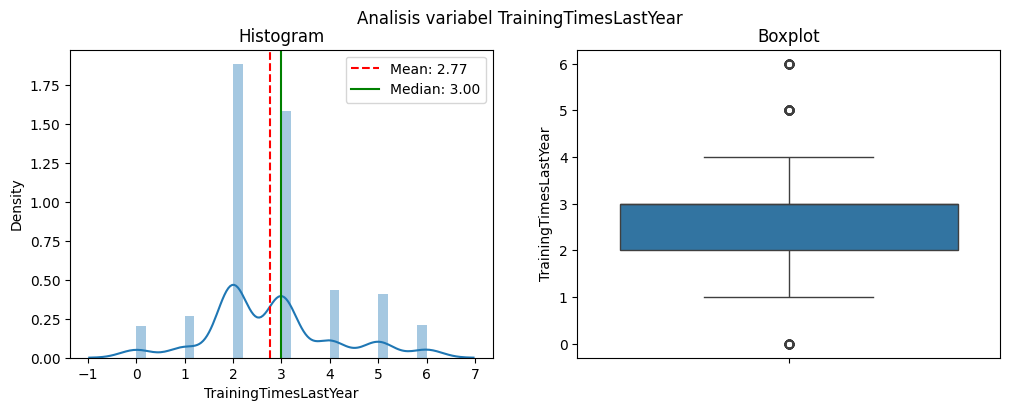

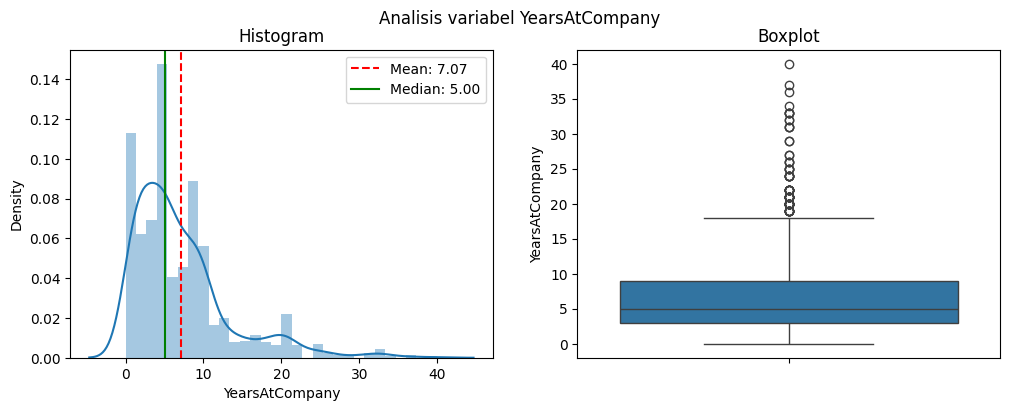

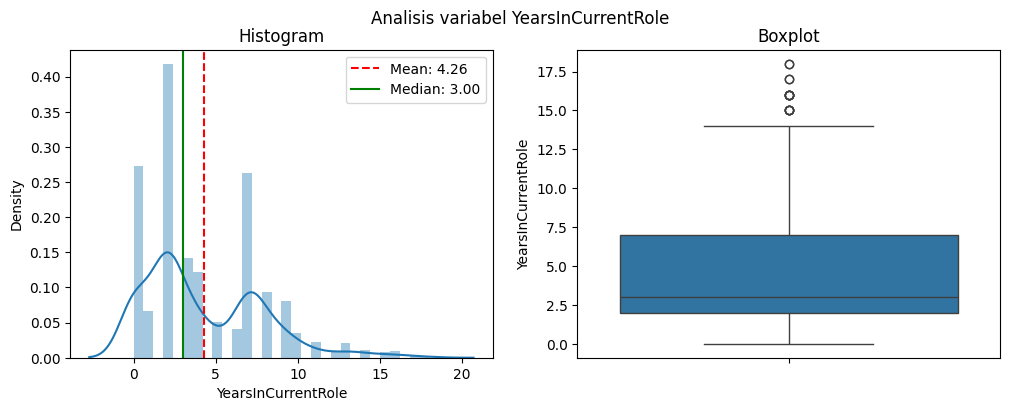

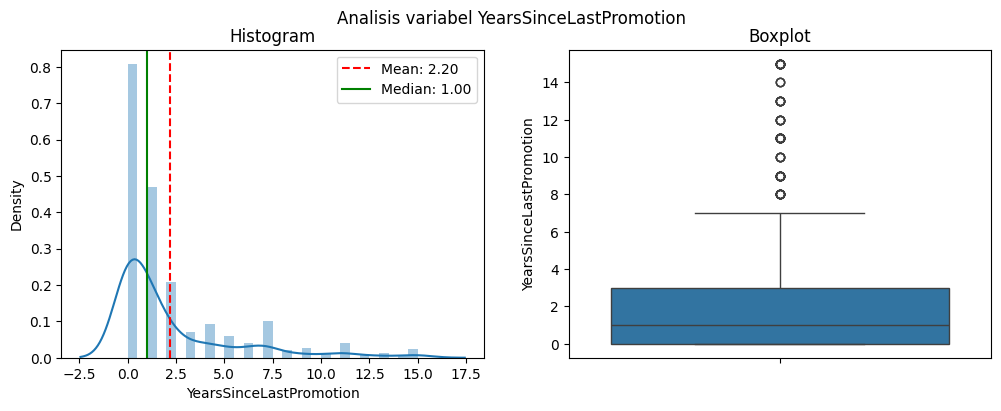

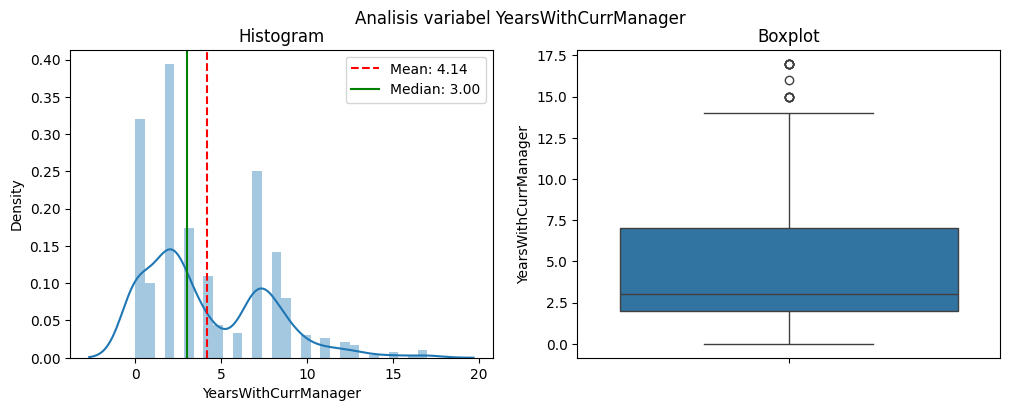

In [ ]:
for column in dataset[var_numerik]:
    cek_plot(dataset, column)

*Menghapus variabel kurang relevan : StandardHours, EmployeeCount, Over18*

In [ ]:
dataset.drop(['StandardHours', 'EmployeeCount', 'Over18'], axis=1, inplace=True)
predict_df.drop(['StandardHours', 'EmployeeCount', 'Over18'], axis=1, inplace=True)

In [ ]:
# Membagi kolom menjadi kolom numerik dan kategori
var_kategori = [var for var in dataset.columns if dataset[var].dtype=='O' and var not in ['Attrition','EmployeeId']]
var_numerik = [var for var in dataset.columns if dataset[var].dtype!='O' and var not in ['Attrition','EmployeeId']]

# Melihat pemisahan variabel
print("Kategori : ",var_kategori)
print("Numerik : ",var_numerik)

Kategori :  ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
Numerik :  ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


*Outlier Handling dengan IQR*

In [ ]:
# Fungsi mendeteksi normal atau skewed
def split_norm_skew_test(data):
    # Membuat data frame dengan nama kolom: feature, skewness, distribution
    global distribution_df
    distribution_df = pd.DataFrame(columns=['feature', 'skewness', 'distribution'])
    for i in range(len(data.columns)):
        if data[data.columns[i]].skew() > -0.5 and data[data.columns[i]].skew() < 0.5:
            distribution_df.loc[i] = [data.columns[i], data[data.columns[i]].skew(), 'normal']
        else:
            distribution_df.loc[i] = [data.columns[i], data[data.columns[i]].skew(), 'skewed']
    print('Membuat tabel "distribution_df"')


# Menjalankan fungsinya
split_norm_skew_test(dataset[var_numerik])

Membuat tabel "distribution_df"


In [ ]:
distribution_df.sort_values(by=['distribution'])

feature  skewness distribution
0                       Age  0.404344       normal
1                 DailyRate -0.035031       normal
3                HourlyRate  0.002125       normal
5               MonthlyRate  0.007449       normal
2          DistanceFromHome  1.006895       skewed
4             MonthlyIncome  1.304486       skewed
6        NumCompaniesWorked  1.016707       skewed
7         PercentSalaryHike  0.815530       skewed
8         TotalWorkingYears  1.082963       skewed
9     TrainingTimesLastYear  0.520530       skewed
10           YearsAtCompany  1.778856       skewed
11       YearsInCurrentRole  0.903767       skewed
12  YearsSinceLastPromotion  1.980618       skewed
13     YearsWithCurrManager  0.829509       skewed

In [ ]:
# Mendeteksi batasan outlier untuk data berdistribusi skewed (Persentil 25 - 1.5*IQR) dan (Persentil 75 + 1.5*IQR)
def outlier_skewed(data, jarak):

    global outliers_skewed
    outliers_skewed = pd.DataFrame(columns=['feature_skewed', 'batas atas', 'batas bawah'])

    for i in range(len(data.columns)):
        # Mendefinisikan IQR
        IQR = data[data.columns[i]].quantile(0.75) - data[data.columns[i]].quantile(0.25)

        # Mendefinisikan batas_bawah dan batas_atas
        bawah = data[data.columns[i]].quantile(0.25) - (IQR * jarak)
        atas = data[data.columns[i]].quantile(0.75) + (IQR * jarak)

        outliers_skewed.loc[i] = [data.columns[i], atas, bawah]

    print('Membuat tabel "outliers_skewed"')

In [ ]:
list_skewed = distribution_df.query("distribution=='skewed'")['feature'].to_list()
list_skewed

['DistanceFromHome',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
outlier_skewed(dataset[list_skewed], 1.5)

Membuat tabel "outliers_skewed"


In [ ]:
outliers_skewed

feature_skewed  batas atas  batas bawah
0         DistanceFromHome      29.500      -14.500
1            MonthlyIncome   17490.875    -5854.125
2       NumCompaniesWorked       8.500       -3.500
3        PercentSalaryHike      27.000        3.000
4        TotalWorkingYears      31.000       -9.000
5    TrainingTimesLastYear       4.500        0.500
6           YearsAtCompany      18.000       -6.000
7       YearsInCurrentRole      14.500       -5.500
8  YearsSinceLastPromotion       7.500       -4.500
9     YearsWithCurrManager      14.500       -5.500

In [ ]:
i=0
for n in list_skewed:
    dataset[[n]] = np.where(dataset[[n]] < outliers_skewed['batas bawah'][i], outliers_skewed['batas bawah'][i],
                           np.where(dataset[[n]] > outliers_skewed['batas atas'][i], outliers_skewed['batas atas'][i], dataset[[n]]))
    i+=1

#dataset[list_skewed].head()

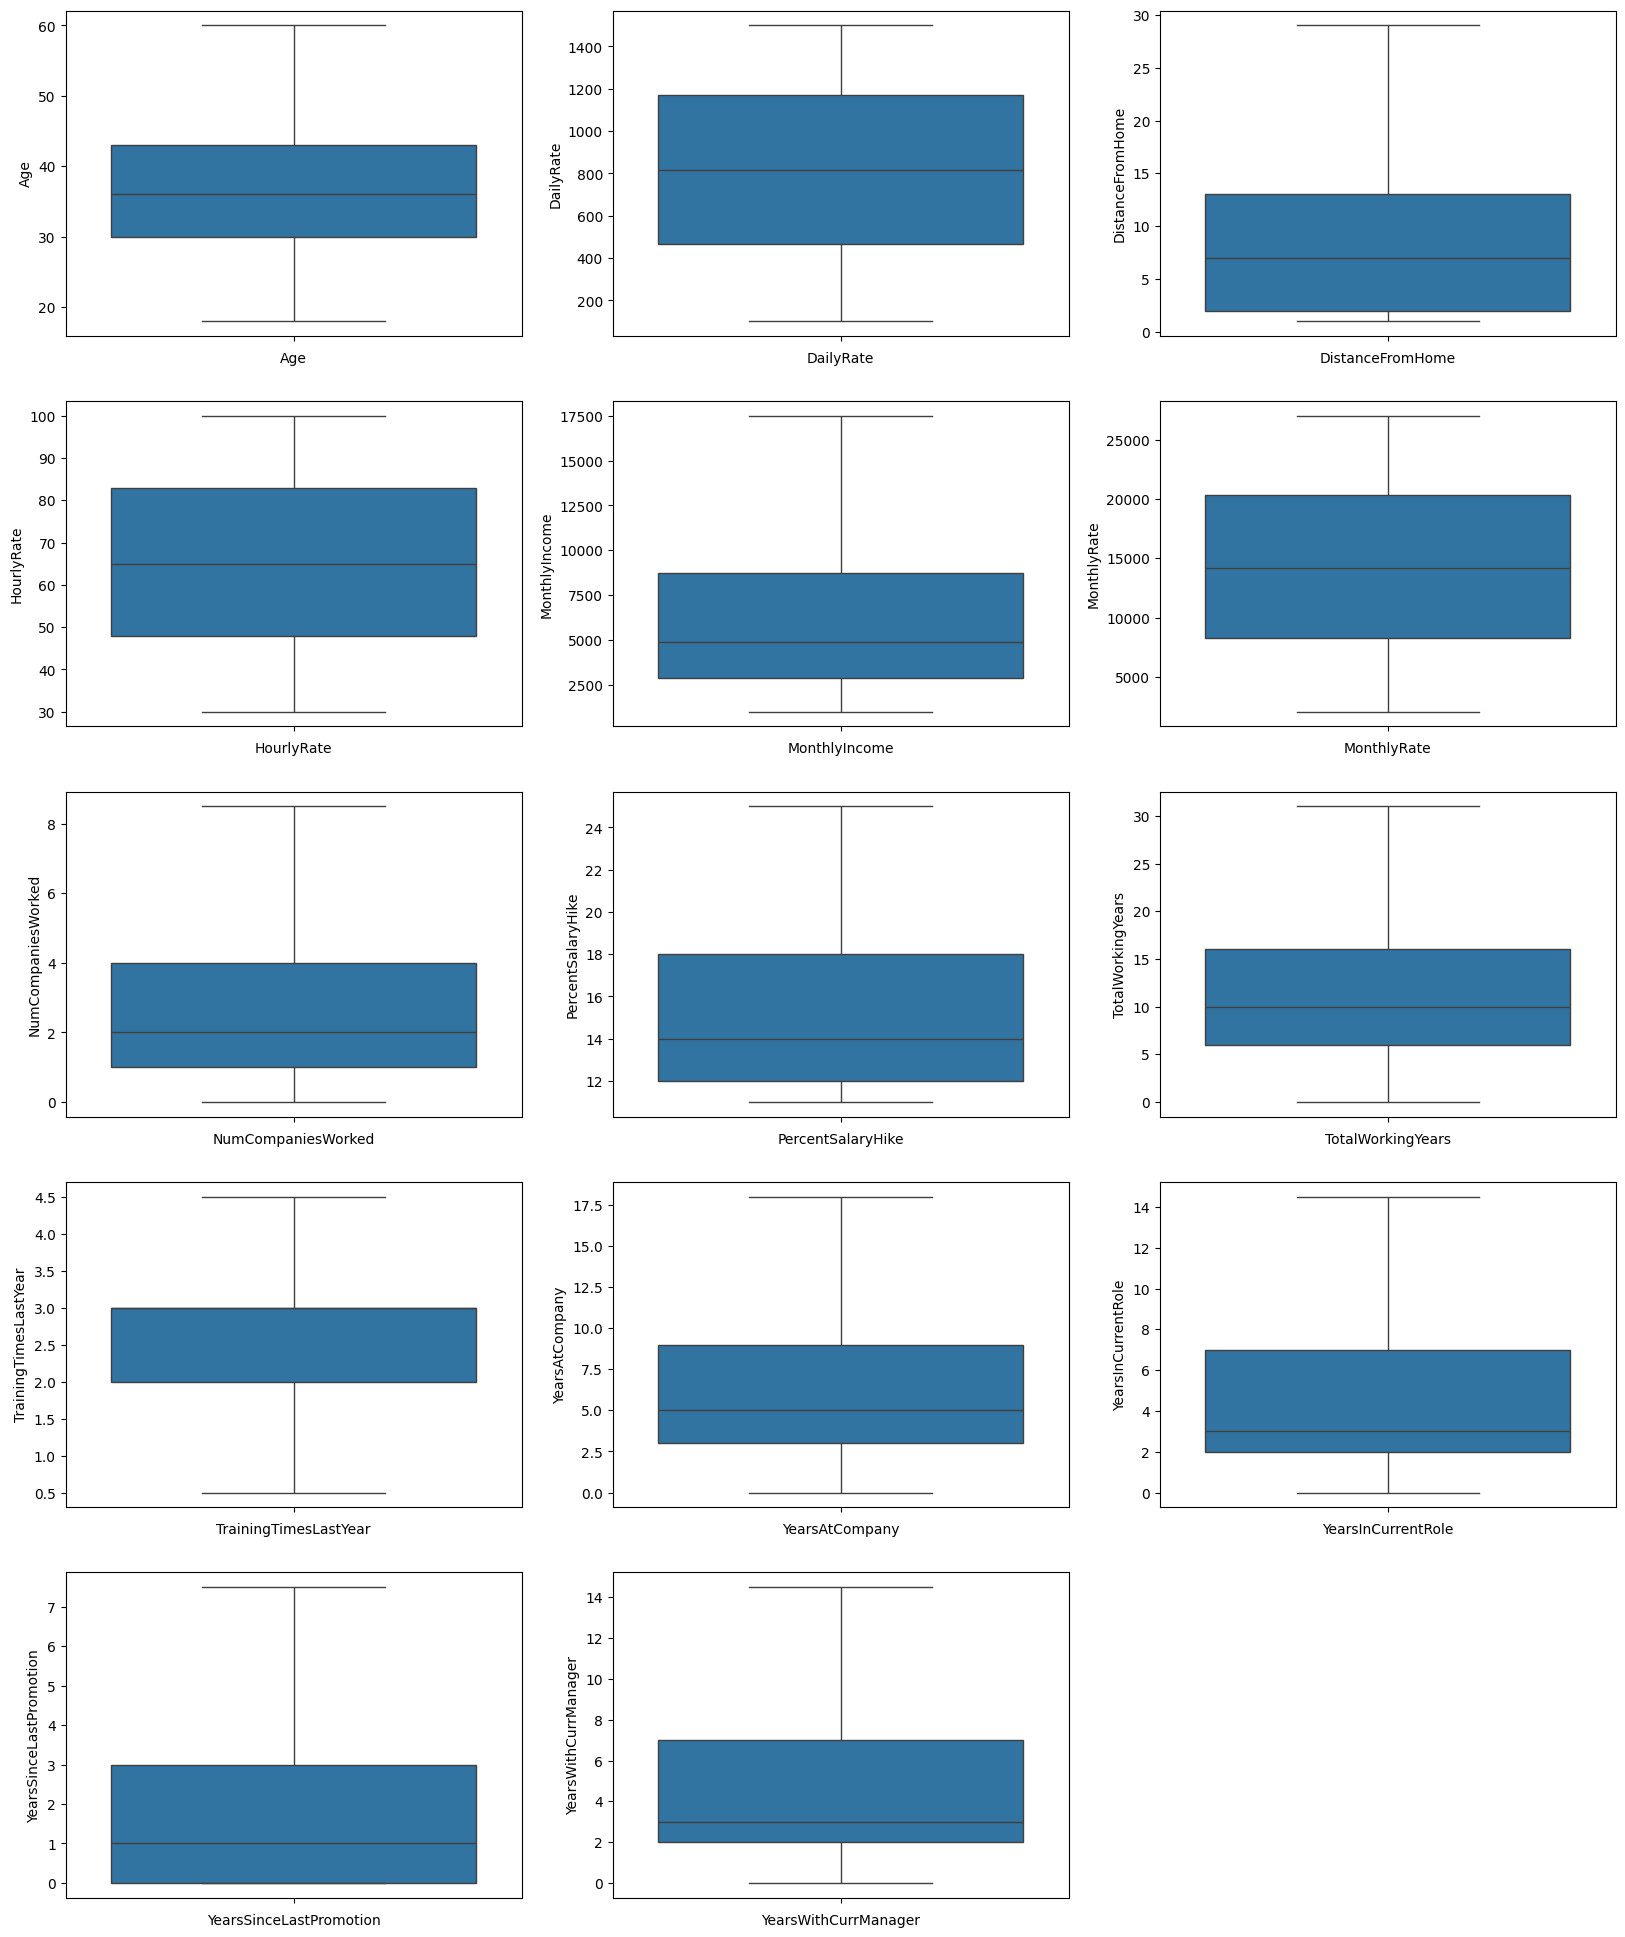

In [ ]:
# Setelah outlier masuk batas atas dan batas bawah
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for i in var_numerik:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(dataset[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

*One Hot Encoding*

In [ ]:
# Hapus kolom EmployeeId
df_noid = dataset.drop(columns=['EmployeeId'], axis=1)
df_noid.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
1   37       1.0      Travel_Rarely       1141  Research & Development   
2   51       1.0      Travel_Rarely       1323  Research & Development   
3   42       0.0  Travel_Frequently        555                   Sales   
6   40       0.0      Travel_Rarely       1124                   Sales   
7   55       1.0      Travel_Rarely        725  Research & Development   

   DistanceFromHome Education EducationField EnvironmentSatisfaction  Gender  \
1              11.0         2        Medical                       1  Female   
2               4.0         4  Life Sciences                       1    Male   
3              26.0         3      Marketing                       3  Female   
6               1.0         2        Medical                       2    Male   
7               2.0         3        Medical                       4    Male   

   HourlyRate JobInvolvement JobLevel                    JobRole  \
1          61              1        2  Healthcare Representative   
2          34              3        1         Research Scientist   
3          77              3        4            Sales Executive   
6          57              1        2            Sales Executive   
7          78              3        5                    Manager   

  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
1               2       Married       4777.000        14382   
2               3       Married       2461.000        10332   
3               2       Married      13525.000        14864   
6               4       Married       7457.000        13273   
7               1       Married      17490.875        21199   

   NumCompaniesWorked OverTime  PercentSalaryHike PerformanceRating  \
1                 5.0       No               15.0                 3   
2                 8.5      Yes               12.0                 3   
3                 5.0       No               14.0                 3   
6                 2.0      Yes               22.0                 4   
7                 5.0      Yes               13.0                 3   

  RelationshipSatisfaction StockOptionLevel  TotalWorkingYears  \
1                        1                0               15.0   
2                        3                3               18.0   
3                        4                1               23.0   
6                        3                3                6.0   
7                        4                1               24.0   

   TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
1                    2.0               1             1.0                 0.0   
2                    2.0               4            10.0                 0.0   
3                    2.0               4            18.0                 4.0   
6                    2.0               2             4.0                 3.0   
7                    2.0               3             5.0                 2.0   

   YearsSinceLastPromotion  YearsWithCurrManager  
1                      0.0                   0.0  
2                      2.0                   7.0  
3                      4.0                   8.0  
6                      0.0                   2.0  
7                      1.0                   4.0

In [ ]:
# Encoding semua kategori dengan OneHotEncoding() sekaligus dinormalisasi dengan MinMaxScaler()
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
one_hot_encoded = encoder.fit_transform(df_noid[var_kategori])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(var_kategori))
df_ohe = pd.concat([df_noid.reset_index(drop=True), one_hot_df], axis=1)
df_ohe.drop(var_kategori, axis=1, inplace=True)

In [ ]:
df_ohe.head()

Age Attrition  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
0   37       1.0       1141              11.0          61       4777.000   
1   51       1.0       1323               4.0          34       2461.000   
2   42       0.0        555              26.0          77      13525.000   
3   40       0.0       1124               1.0          57       7457.000   
4   55       1.0        725               2.0          78      17490.875   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0        14382                 5.0               15.0               15.0   
1        10332                 8.5               12.0               18.0   
2        14864                 5.0               14.0               23.0   
3        13273                 2.0               22.0                6.0   
4        21199                 5.0               13.0               24.0   

   TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0                    2.0             1.0                 0.0   
1                    2.0            10.0                 0.0   
2                    2.0            18.0                 4.0   
3                    2.0             4.0                 3.0   
4                    2.0             5.0                 2.0   

   YearsSinceLastPromotion  YearsWithCurrManager  \
0                      0.0                   0.0   
1                      2.0                   7.0   
2                      4.0                   8.0   
3                      0.0                   2.0   
4                      1.0                   4.0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                               0.0                           1.0   
1                               0.0                           1.0   
2                               1.0                           0.0   
3                               0.0                           1.0   
4                               0.0                           1.0   

   Department_Research & Development  Department_Sales  Education_2  \
0                                1.0               0.0          1.0   
1                                1.0               0.0          0.0   
2                                0.0               1.0          0.0   
3                                0.0               1.0          1.0   
4                                1.0               0.0          0.0   

   Education_3  Education_4  Education_5  EducationField_Life Sciences  \
0          0.0          0.0          0.0                           0.0   
1          0.0          1.0          0.0                           1.0   
2          1.0          0.0          0.0                           0.0   
3          0.0          0.0          0.0                           0.0   
4          1.0          0.0          0.0                           0.0   

   EducationField_Marketing  EducationField_Medical  EducationField_Other  \
0                       0.0                     1.0                   0.0   
1                       0.0                     0.0                   0.0   
2                       1.0                     0.0                   0.0   
3                       0.0                     1.0                   0.0   
4                       0.0                     1.0                   0.0   

   EducationField_Technical Degree  EnvironmentSatisfaction_2  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              0.0                        1.0   
4                              0.0                        0.0   

   EnvironmentSatisfaction_3  EnvironmentSatisfaction_4  Gender_Male  \
0                        0.0                        0.0          0.0   
1                        0.0                        0.0          1.0   
2                        1.0      

In [ ]:
df_ohe.dropna(subset=['Attrition'], axis=0, inplace=True)
df_ohe['Attrition'].value_counts(dropna=False)

Attrition
0.0    879
1.0    179
Name: count, dtype: int64

In [ ]:
df_ohe.shape

(1058, 63)

*Feature Scaling*

In [ ]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_ohe), columns=df_ohe.columns)

In [ ]:
df_scaled.head()

Age  Attrition  DailyRate  DistanceFromHome  HourlyRate  \
0  0.452381        1.0   0.743737          0.357143    0.442857   
1  0.785714        1.0   0.874016          0.107143    0.057143   
2  0.571429        0.0   0.324266          0.892857    0.671429   
3  0.523810        0.0   0.731568          0.000000    0.385714   
4  0.880952        1.0   0.445956          0.035714    0.685714   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
0       0.228615     0.493395            0.588235           0.285714   
1       0.088097     0.330777            1.000000           0.071429   
2       0.759380     0.512748            0.588235           0.214286   
3       0.391218     0.448866            0.235294           0.785714   
4       1.000000     0.767115            0.588235           0.142857   

   TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0           0.483871                  0.375        0.055556   
1           0.580645                  0.375        0.555556   
2           0.741935                  0.375        1.000000   
3           0.193548                  0.375        0.222222   
4           0.774194                  0.375        0.277778   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0            0.000000                 0.000000              0.000000   
1            0.000000                 0.266667              0.482759   
2            0.275862                 0.533333              0.551724   
3            0.206897                 0.000000              0.137931   
4            0.137931                 0.133333              0.275862   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                               0.0                           1.0   
1                               0.0                           1.0   
2                               1.0                           0.0   
3                               0.0                           1.0   
4                               0.0                           1.0   

   Department_Research & Development  Department_Sales  Education_2  \
0                                1.0               0.0          1.0   
1                                1.0               0.0          0.0   
2                                0.0               1.0          0.0   
3                                0.0               1.0          1.0   
4                                1.0               0.0          0.0   

   Education_3  Education_4  Education_5  EducationField_Life Sciences  \
0          0.0          0.0          0.0                           0.0   
1          0.0          1.0          0.0                           1.0   
2          1.0          0.0          0.0                           0.0   
3          0.0          0.0          0.0                           0.0   
4          1.0          0.0          0.0                           0.0   

   EducationField_Marketing  EducationField_Medical  EducationField_Other  \
0                       0.0                     1.0                   0.0   
1                       0.0                     0.0                   0.0   
2                       1.0                     0.0                   0.0   
3                       0.0                     1.0                   0.0   
4                       0.0                     1.0                   0.0   

   EducationField_Technical Degree  EnvironmentSatisfaction_2  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              0.0                        1.0   
4                              0.0                        0.0   

   EnvironmentSatisfaction_3  EnvironmentSatisfaction_4  Gender_Male  \
0                        0.0                        0.0          0.0   
1                        0.0                        0.0          1.0   
2  

In [ ]:
df_scaled.shape

(1058, 63)

*Feature Selection*

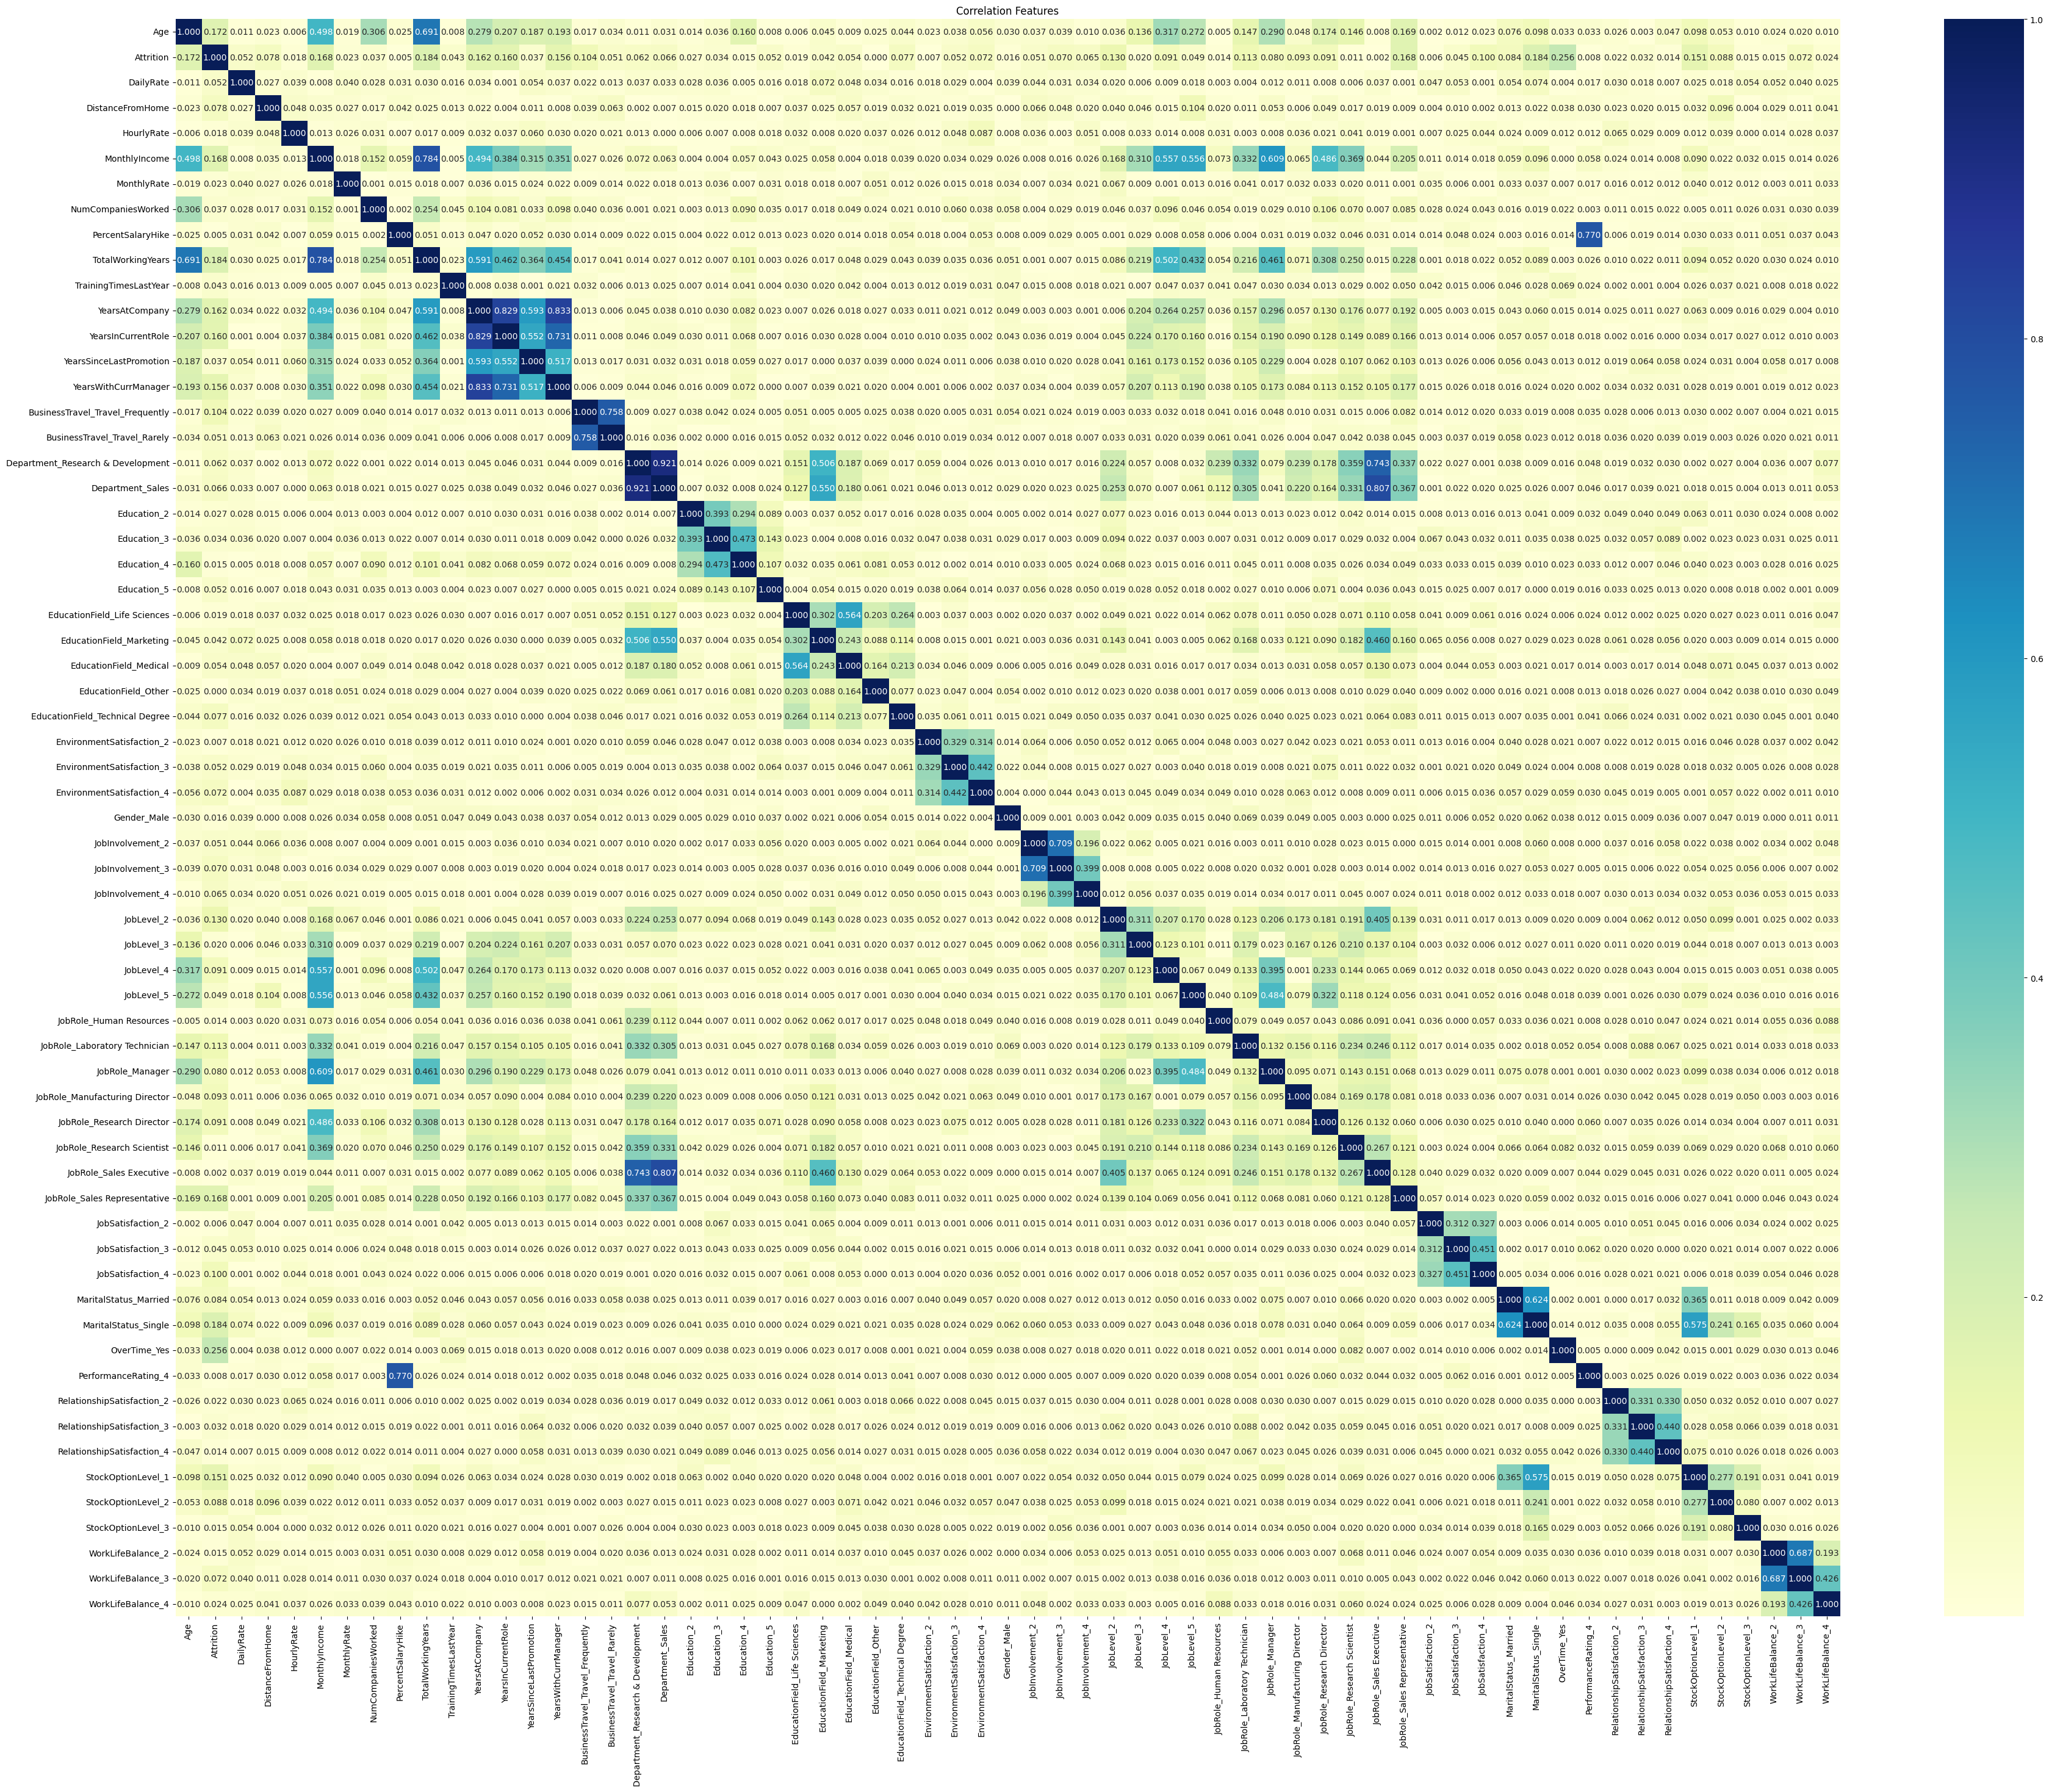

In [ ]:
# Heatmap korelasi fitur dataframe yang telah dinormalisasi
plt.figure(figsize=(44, 34))
sns.heatmap(df_scaled.corr().abs(), cmap="YlGnBu", annot=True, fmt='.3f')
plt.title('Correlation Features')
plt.show()

In [ ]:
def correlation(df, threshold):
  correlated_cols = set()
  corr_matrix = df.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        correlated_cols.add(colname)
  return correlated_cols

In [ ]:
# Seleksi fitur-fitur multicollinearity, threshold 0.80
correlation(df_scaled, 0.8)

{'Department_Sales',
 'JobRole_Sales Executive',
 'YearsInCurrentRole',
 'YearsWithCurrManager'}

In [ ]:
# Hapus fitur multicollinearity
df_scaled.drop(columns=['Department_Sales', 'JobRole_Sales Executive', 'YearsInCurrentRole', 'YearsWithCurrManager'], axis=1, inplace=True)
#predict_df.drop(columns=['YearsInCurrentRole', 'YearsWithCurrManager'], axis=1, inplace=True)

In [ ]:
# Mencari fitur relevan dengan label, threshold 0.07
cor = df_scaled.corr()
cor_target = abs(cor["Attrition"])
relevant_features = cor_target[cor_target > 0.05]
new_df = df_scaled.loc[:, relevant_features.index]
new_df.head()

Age  Attrition  DailyRate  DistanceFromHome  MonthlyIncome  \
0  0.452381        1.0   0.743737          0.357143       0.228615   
1  0.785714        1.0   0.874016          0.107143       0.088097   
2  0.571429        0.0   0.324266          0.892857       0.759380   
3  0.523810        0.0   0.731568          0.000000       0.391218   
4  0.880952        1.0   0.445956          0.035714       1.000000   

   TotalWorkingYears  YearsAtCompany  BusinessTravel_Travel_Frequently  \
0           0.483871        0.055556                               0.0   
1           0.580645        0.555556                               0.0   
2           0.741935        1.000000                               1.0   
3           0.193548        0.222222                               0.0   
4           0.774194        0.277778                               0.0   

   BusinessTravel_Travel_Rarely  Department_Research & Development  \
0                           1.0                                1.0   
1                           1.0                                1.0   
2                           0.0                                0.0   
3                           1.0                                0.0   
4                           1.0                                1.0   

   Education_5  EducationField_Medical  EducationField_Technical Degree  \
0          0.0                     1.0                              0.0   
1          0.0                     0.0                              0.0   
2          0.0                     0.0                              0.0   
3          0.0                     1.0                              0.0   
4          0.0                     1.0                              0.0   

   EnvironmentSatisfaction_3  EnvironmentSatisfaction_4  JobInvolvement_2  \
0                        0.0                        0.0               0.0   
1                        0.0                        0.0               0.0   
2                        1.0                        0.0               0.0   
3                        0.0                        0.0               0.0   
4                        0.0                        1.0               0.0   

   JobInvolvement_3  JobInvolvement_4  JobLevel_2  JobLevel_4  \
0               0.0               0.0         1.0         0.0   
1               1.0               0.0         0.0         0.0   
2               1.0               0.0         0.0         1.0   
3               0.0               0.0         1.0         0.0   
4               1.0               0.0         0.0         0.0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                            0.0              0.0   
1                            0.0              0.0   
2                            0.0              0.0   
3                            0.0              0.0   
4                            0.0              1.0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   

   JobRole_Sales Representative  JobSatisfaction_4  MaritalStatus_Married  \
0                           0.0                0.0                    1.0   
1                           0.0                0.0                    1.0   
2                           0.0                0.0                    1.0   
3                           0.0                1.0                    1.0   
4                           0.0                0.0                    1.0   

   MaritalStatus_Single  OverTime_Yes  StockOptionLevel_1  StockOptionLevel_2  \
0                   0.0           0.0                 0.0                 0.0   
1                   0.0           1.0                 0.0                 0.0   
2     

In [ ]:
new_df.shape

(1058, 32)

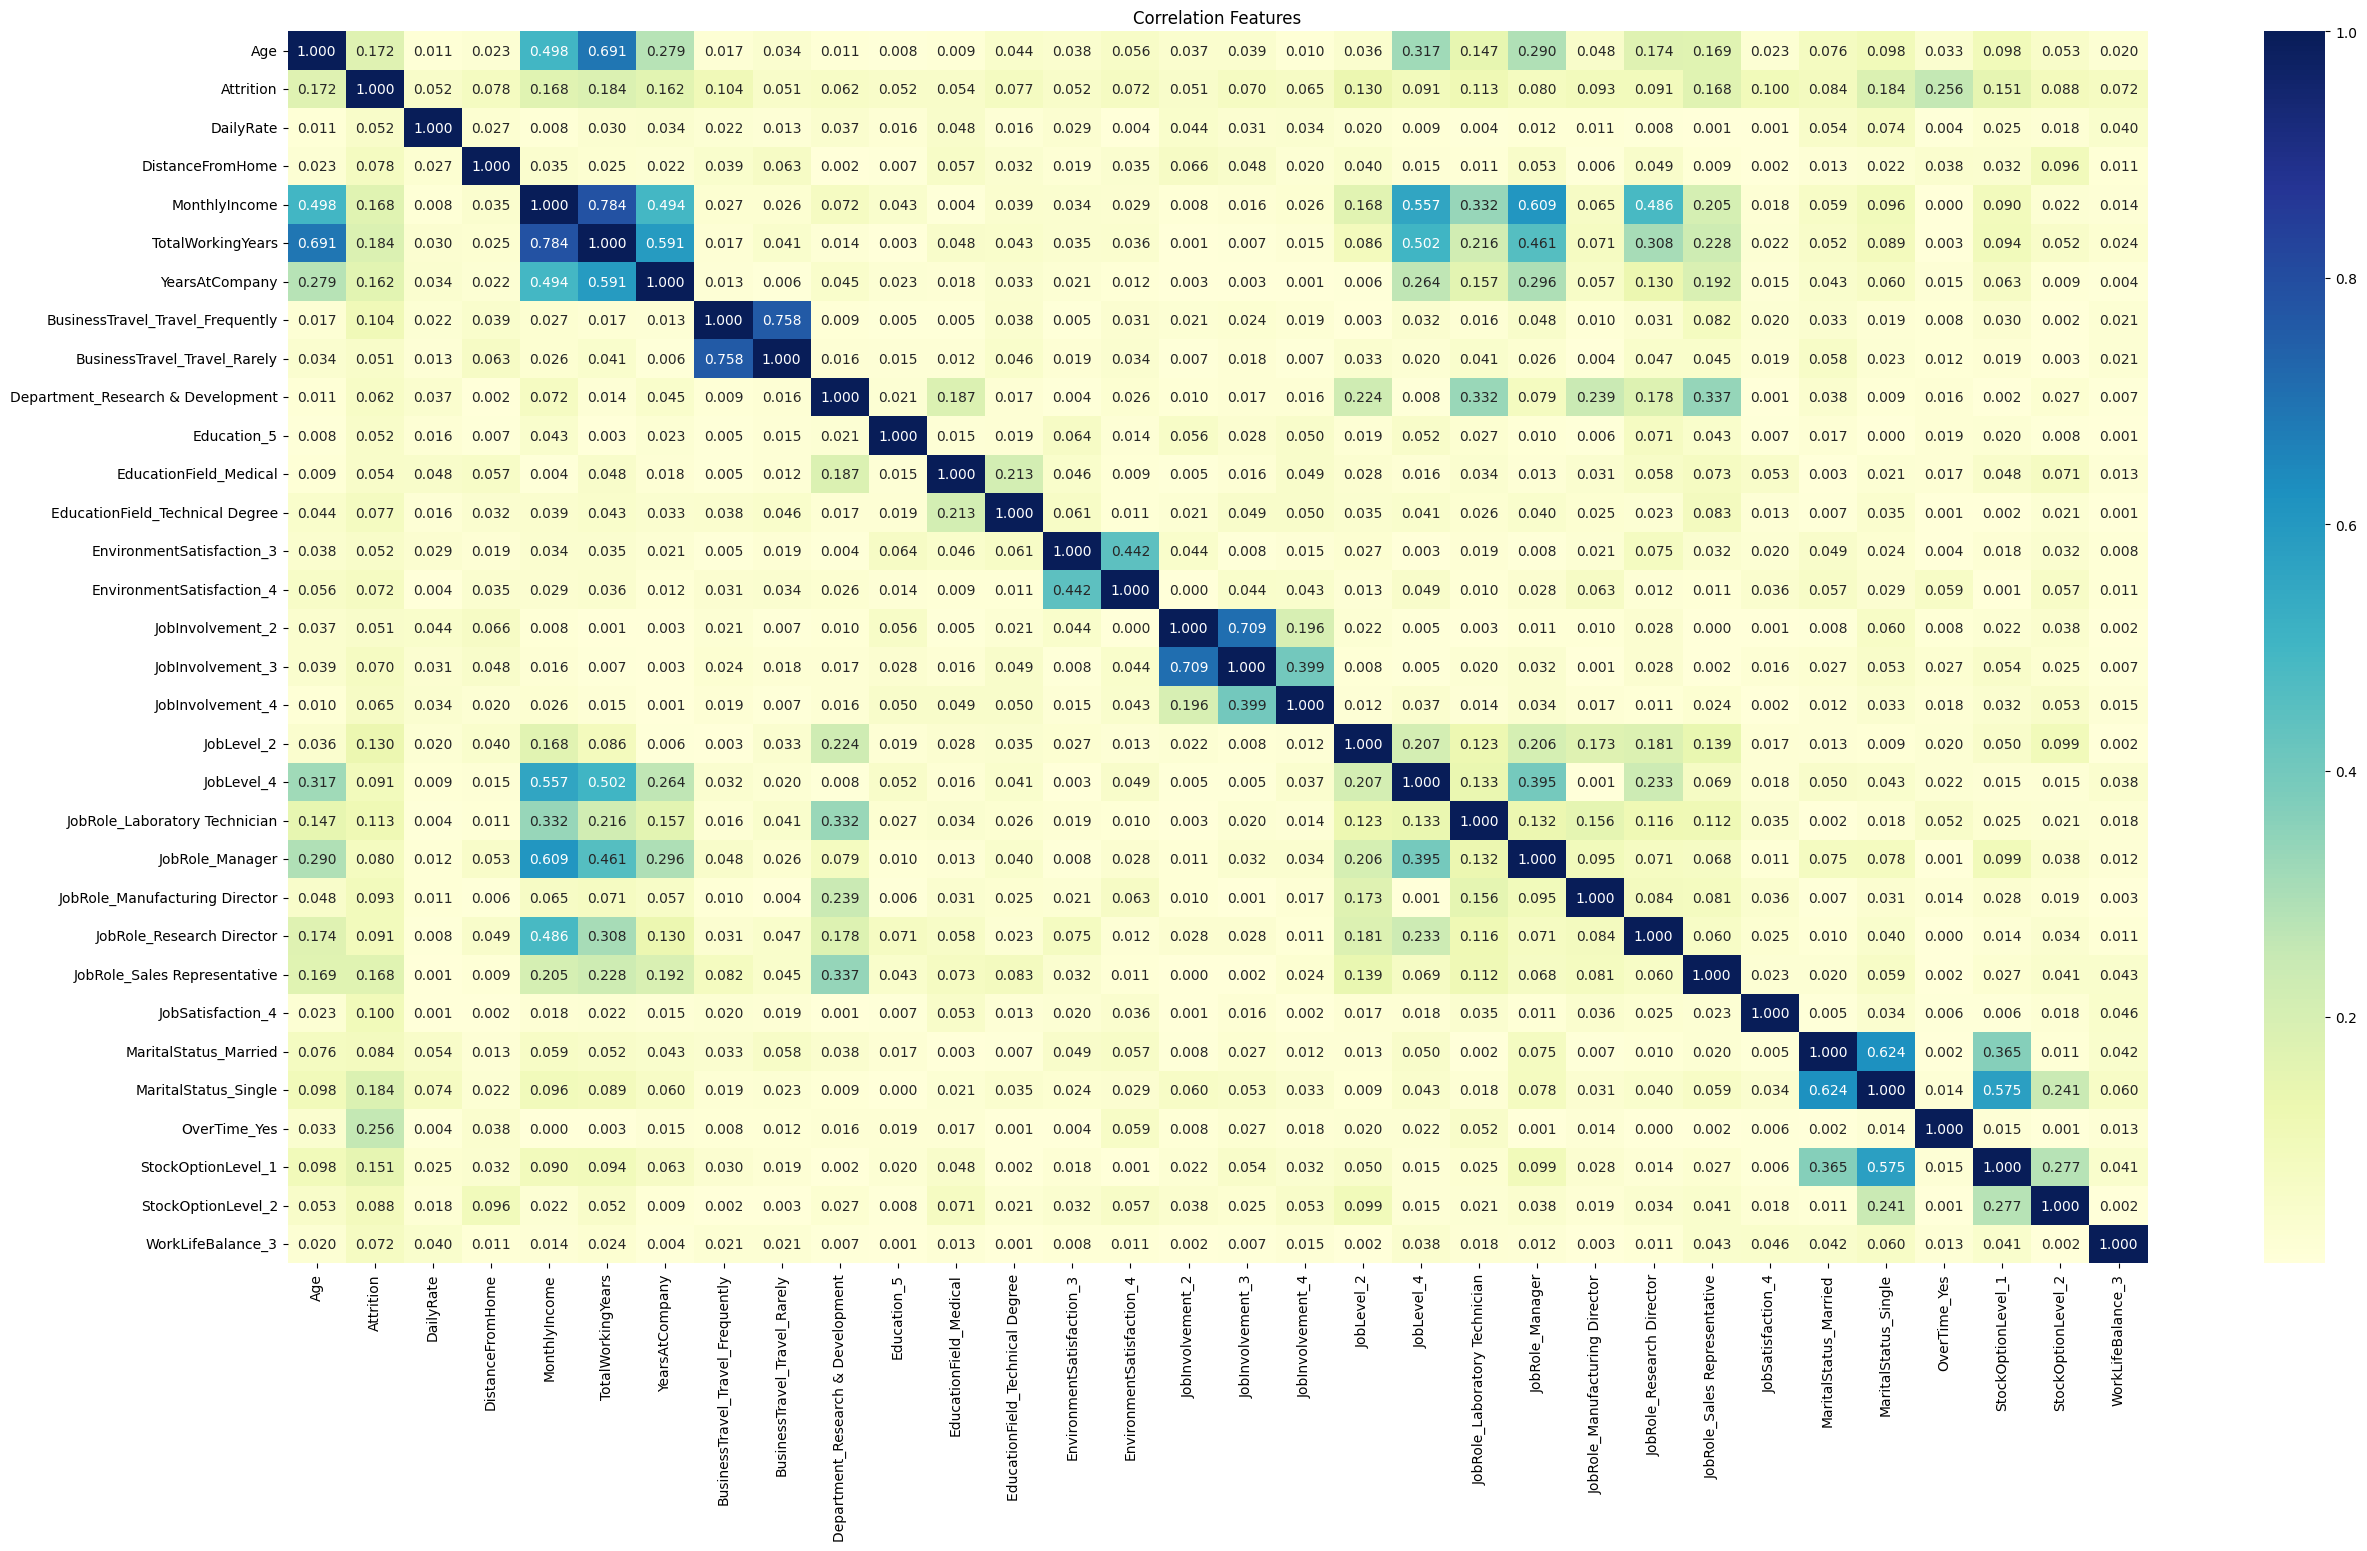

In [ ]:
# Heatmap korelasi fitur dan label Attrition
plt.figure(figsize=(30, 16))
sns.heatmap(new_df.corr().abs(), cmap="YlGnBu", annot=True, fmt='.3f')
plt.title('Correlation Features')
plt.show()

In [ ]:
"""relv_df = predict_df.loc[:, relevant_features.index]
test_df = pd.concat([predict_df['EmployeeId'], relv_df], axis=1)
test_df.head()"""

"relv_df = predict_df.loc[:, relevant_features.index]\ntest_df = pd.concat([predict_df['EmployeeId'], relv_df], axis=1)\ntest_df.head()"

## Modeling

*Over Sampling dengan SMOTE*

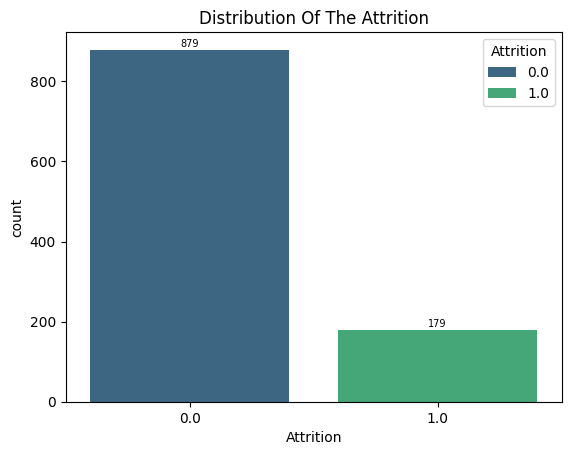

In [ ]:
# Plotting countplot of Attrition
ax = sns.countplot(x = new_df['Attrition'], hue=new_df['Attrition'], palette='viridis')
for c in ax.containers:
    ax.bar_label(c, label_type='edge', padding=1, size=7)
ax.set_title("Distribution Of The Attrition")
plt.show()

In [ ]:
X = new_df.drop(['Attrition'], axis=1)
y = new_df['Attrition']

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 0)
X_res, y_res = smote.fit_resample(X,y)

<Axes: >

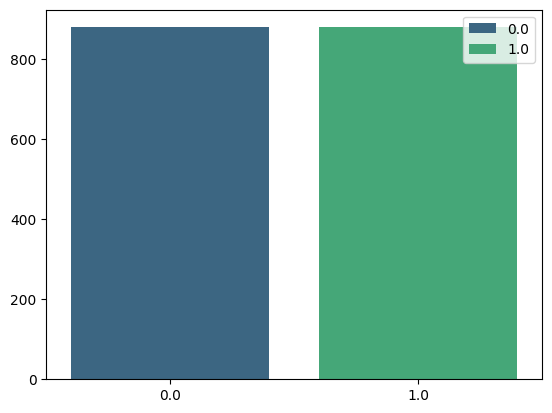

In [ ]:
idx, c = np.unique(y_res, return_counts=True)
sns.barplot(x=idx, y=c, hue=idx, palette='viridis')

*Splitting Data*

In [ ]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X_res,
    y_res,
    test_size = 0.2,
    random_state = 0)

# Reset indeks dengan looping
for i in [X_train, X_test, y_train, y_test]:
    i.reset_index(drop=True, inplace=True)

# Melihat dimensi training set dan test set
print(X_train.shape, X_test.shape)

(1406, 31) (352, 31)


*Model Selection*

In [ ]:
# Membuat object masing-masing model
classifier_used = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    BernoulliNB()
]

In [ ]:
# Akurasi model dengan cross validation
features = X_res
labels = y_res
CV = 5
accu_list = []
ModelName = []

for classifier in classifier_used:
    model_name = classifier.__class__.__name__
    accuracies = cross_val_score(classifier, features, labels, scoring = 'accuracy', cv=CV)
    accu_list.append(accuracies.mean()*100)
    ModelName.append(model_name)

model_acc_df = pd.DataFrame({'Model' : ModelName, 'Cross_Val_Accuracy' : accu_list})
model_acc_df = model_acc_df.sort_values('Cross_Val_Accuracy', ascending = False)
model_acc_df

Model  Cross_Val_Accuracy
3  RandomForestClassifier           92.382317
4                     SVC           89.762691
2  DecisionTreeClassifier           84.816110
1    KNeighborsClassifier           80.091136
0      LogisticRegression           80.033508
5             BernoulliNB           73.606255

**Insight**

Cross Validation tanpa hyperparameter tuning diketahui model Random Forest Classifier menjadi model terbaik dengan akurasi sebesar 92,78%

## Evaluation

*Evaluasi model terbaik : RandomForestClassifier*

In [ ]:
#LR = LogisticRegression()
RF = RandomForestClassifier()

In [ ]:
# Memprediksi X_train
print('Per-Class Metrics for RandomForestClassifier')
RF.fit(X_train, y_train)
y_pred = RF.predict(X_train)
print("")
print(classification_report(y_train, y_pred, digits=4))

Per-Class Metrics for RandomForestClassifier

              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000       700
         1.0     1.0000    1.0000    1.0000       706

    accuracy                         1.0000      1406
   macro avg     1.0000    1.0000    1.0000      1406
weighted avg     1.0000    1.0000    1.0000      1406



In [ ]:
# Memprediksi X_test
print('Per-Class Metrics for RandomForestClassifier')
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print("")
print(classification_report(y_test, y_pred, digits=4))

Per-Class Metrics for RandomForestClassifier

              precision    recall  f1-score   support

         0.0     0.9202    0.9665    0.9428       179
         1.0     0.9634    0.9133    0.9377       173

    accuracy                         0.9403       352
   macro avg     0.9418    0.9399    0.9402       352
weighted avg     0.9414    0.9403    0.9403       352



<Axes: >

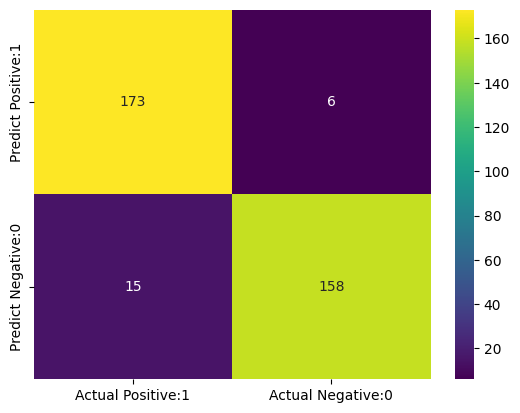

In [ ]:
# Visualisasi confusion matrix prediksi X_test
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data = cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')

**Hyperparameter Tuning : RandomForestClassifier**

In [ ]:
# Hyperparameter tuning LogisticRegression
"""param_lr = {'penalty': ['l1','l2'],
            'C': [0.01, 0.09, 0.1, 0.125, 1, 1.5],
            'solver' : ['liblinear', 'newton-cg', 'sag', 'saga', 'lbfgs']
            }"""

"param_lr = {'penalty': ['l1','l2'],\n            'C': [0.01, 0.09, 0.1, 0.125, 1, 1.5],\n            'solver' : ['liblinear', 'newton-cg', 'sag', 'saga', 'lbfgs']\n            }"

In [ ]:
# Hyperparameter tuning RandomForestClassifier
param_rf = {'n_estimators': [50, 100, 200],
            'criterion': ['gini', 'entropy', 'log_loss'],
            'max_depth': [1, 2, 3, 4],
            'min_samples_split': [2, 3],
            'min_samples_leaf': [1, 2, 3]
            }

In [ ]:
akurasi_tuning = []
akurasi_tuning_test = []
best_score = []
best_param = []

In [ ]:
# Akurasi model dengan GridSearchCV

model_grid_cv = GridSearchCV(
    RF,
    param_rf,
    cv=5,
    scoring='accuracy',   # nilai accuracy untuk penentuan parameter scoring terbaik
    verbose=1,    # menampilkan langkah-langkah pemrosesan untuk setiap eksekusi
    n_jobs=-1
    )

# Fitting ke training set
model_grid_cv.fit(X_train, y_train)

# Mencoba memprediksi training dan test set setelah fitting di training set, kemudian dikemas dalam format DataFrame
pred_train = pd.DataFrame(model_grid_cv.predict(X_train), columns=['Attrition'])
pred_test = pd.DataFrame(model_grid_cv.predict(X_test), columns=['Attrition'])

# Mencatat skor akurasi training dan test set
akurasi_tuning.append(accuracy_score(y_train, pred_train))
akurasi_tuning_test.append(accuracy_score(y_test, pred_test))

# Mencatat skor akurasi terbaik kombinasi parameter
best_score.append(model_grid_cv.best_score_)

# Mencatat parameter terbaik di setiap model
best_param.append(model_grid_cv.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
# Accuracy Score
pd.set_option('display.max_colwidth', None)
grid_akurasi = pd.DataFrame({'Model': RF.__class__.__name__, 'Akurasi Train': akurasi_tuning, 'Akurasi Test': akurasi_tuning_test})
grid_akurasi['Akurasi Train'] = grid_akurasi['Akurasi Train']*100
grid_akurasi['Akurasi Test'] = grid_akurasi['Akurasi Test']*100
grid_akurasi_urut = grid_akurasi.sort_values(by='Akurasi Test', ascending=False,  ignore_index=True)
grid_akurasi_urut

Model  Akurasi Train  Akurasi Test
0  RandomForestClassifier      87.553343     84.943182

In [ ]:
# best_score_
grid_score = pd.DataFrame({'Model':RF.__class__.__name__, 'Score':best_score})
grid_score['Score'] = grid_score['Score']*100
grid_score_urut = grid_score.sort_values(by='Score', ascending=False,  ignore_index=True)
grid_score_urut

Model      Score
0  RandomForestClassifier  85.492037

In [ ]:
# Parameter terbaik dari model terbaik
grid_param = pd.DataFrame({'Model':RF.__class__.__name__, 'Param':best_param})
grid_param

Model  \
0  RandomForestClassifier   

                                                                                                           Param  
0  {'criterion': 'log_loss', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200}

**Insight**

Best score dari best parameter model Random Forest Classifier setelah melakukan Grid Search Cross Validation adalah 85,49%

## Feature Importance

In [196]:
# Built-in feature importance sesuai best parameter
clf = RandomForestClassifier(criterion='log_loss', max_depth= 4, min_samples_leaf= 2, min_samples_split= 3, n_estimators= 200, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', max_depth=4, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=200, random_state=0)

In [197]:
# Melihat feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

OverTime_Yes                         0.209195
JobSatisfaction_4                    0.083684
TotalWorkingYears                    0.069517
MonthlyIncome                        0.059016
Age                                  0.058710
EnvironmentSatisfaction_4            0.057954
JobLevel_2                           0.052013
YearsAtCompany                       0.048556
MaritalStatus_Single                 0.045807
EnvironmentSatisfaction_3            0.038160
StockOptionLevel_1                   0.037327
WorkLifeBalance_3                    0.032012
DistanceFromHome                     0.025517
DailyRate                            0.023735
StockOptionLevel_2                   0.021684
JobRole_Laboratory Technician        0.021490
JobRole_Sales Representative         0.018219
JobRole_Manufacturing Director       0.017988
MaritalStatus_Married                0.014298
Department_Research & Development    0.009211
JobRole_Research Director            0.008327
BusinessTravel_Travel_Frequently     0.007695
EducationField_Medical               0.007569
JobInvolvement_4                     0.007179
JobRole_Manager                      0.006747
JobLevel_4                           0.005705
JobInvolvement_3                     0.004604
BusinessTravel_Travel_Rarely         0.003258
JobInvolvement_2                     0.002382
EducationField_Technical Degree      0.001490
Education_5                          0.000950
dtype: float64

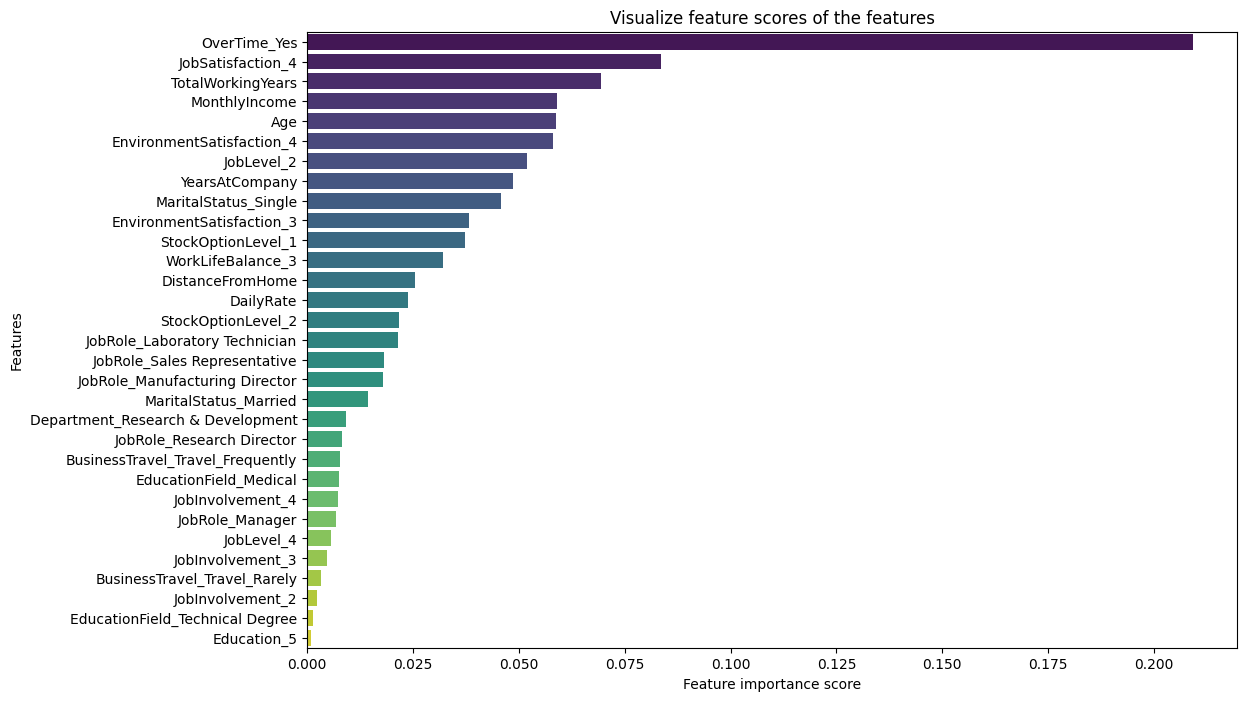

In [198]:
# Creating a seaborn bar plot
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x = feature_scores, y = feature_scores.index, palette='viridis')
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

**Insight**

Top 10 fitur terpenting dalam kasus klasfikasi ini antara lain OverTime, TotalWorkingYears, MonthlyIncome, JobSatisfaction, EnvironmentSatisfaction, Age, JobLevel, YearsAtCompany, MaritalStatus, StockOptionLevel.

## Memprediksi predict_df

In [199]:
# Membuat dataframe baru untuk pemodelan setelah melakukan Hyperparameter Tuning dengan menggunakan fitur top 8
df_final = dataset.loc[:, ['Attrition','OverTime','TotalWorkingYears','MonthlyIncome','JobSatisfaction','EnvironmentSatisfaction','Age','JobLevel','YearsAtCompany','MaritalStatus','StockOptionLevel']]
df_final.head()

Attrition OverTime  TotalWorkingYears  MonthlyIncome JobSatisfaction  \
1       1.0       No               15.0       4777.000               2   
2       1.0      Yes               18.0       2461.000               3   
3       0.0       No               23.0      13525.000               2   
6       0.0      Yes                6.0       7457.000               4   
7       1.0      Yes               24.0      17490.875               1   

  EnvironmentSatisfaction  Age JobLevel  YearsAtCompany MaritalStatus  \
1                       1   37        2             1.0       Married   
2                       1   51        1            10.0       Married   
3                       3   42        4            18.0       Married   
6                       2   40        2             4.0       Married   
7                       4   55        5             5.0       Married   

  StockOptionLevel  
1                0  
2                3  
3                1  
6                3  
7                1

In [200]:
# Membagi X dan y dari dataset diatas
X_new = df_final.drop(['Attrition'], axis=1)
y_new = df_final['Attrition']

In [201]:
# Membuat dataframe baru untuk prediksi setelah melakukan Hyperparameter Tuning dengan menggunakan fitur top 8
predict_final = predict_df.loc[:, ['EmployeeId','OverTime','TotalWorkingYears','MonthlyIncome','JobSatisfaction','EnvironmentSatisfaction','Age','JobLevel','YearsAtCompany','MaritalStatus','StockOptionLevel']]
predict_final.head()

EmployeeId OverTime  TotalWorkingYears  MonthlyIncome JobSatisfaction  \
0            1      Yes                  7           2991               2   
4            5       No                 20           2001               3   
5            6       No                  1           2804               2   
12          13      Yes                 11           4591               3   
18          19       No                  7           5206               3   

   EnvironmentSatisfaction  Age JobLevel  YearsAtCompany MaritalStatus  \
0                        4   38        1               6       Married   
4                        3   40        1               5       Married   
5                        4   29        1               1       Married   
12                       3   47        2               5       Married   
18                       4   25        2               7      Divorced   

   StockOptionLevel  
0                 1  
4                 3  
5                 0  
12                1  
18                2

In [202]:
# Mendefinisikan X_pred
X_pred = predict_final.drop(['EmployeeId'], axis=1)

In [203]:
# Membagi kolom menjadi kolom numerik dan kategori
var_kategori = [var for var in X_new.columns if X_new[var].dtype=='O']
var_numerik = [var for var in X_new.columns if X_new[var].dtype!='O']

# Melihat pemisahan variabel
print("Kategori : ",var_kategori)
print("Numerik : ",var_numerik)

Kategori :  ['OverTime', 'JobSatisfaction', 'EnvironmentSatisfaction', 'JobLevel', 'MaritalStatus', 'StockOptionLevel']
Numerik :  ['TotalWorkingYears', 'MonthlyIncome', 'Age', 'YearsAtCompany']


In [204]:
# Membuat Pipeline untuk preprocessing
preprocessor_numerik = Pipeline([
    ('imputasi', SimpleImputer(strategy='median')),
    ('scaling', MinMaxScaler())
])

preprocessor_kategori = Pipeline([
    ('imputasi', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoding', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

# Menggabungkan kedua pipeline di atas
preprocessor = ColumnTransformer([
    ('preprocessing numerik', preprocessor_numerik, var_numerik),
    ('preprocessing kategori', preprocessor_kategori, var_kategori)
])

In [205]:
# Pipeline model RandomForestClassifier
pipe_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('rf', clf)
])

In [206]:
pipe_rf.fit(X_new, y_new)
#result = pipe_rf.predict(X_pred)
#predict_final['attrition_pred'] = result
#predict_final.head()

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('preprocessing numerik',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['TotalWorkingYears',
                                                   'MonthlyIncome', 'Age',
                                                   'YearsAtCompany']),
                                                 ('preprocessing kategori',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['OverTime',
                                                   'JobSatisfaction',
                                                   'EnvironmentSatisfaction',
                                                   'JobLevel', 'MaritalStatus',
                                                   'StockOptionLevel'])])),
                ('rf',
                 RandomForestClassifier(criterion='log_loss', max_depth=4,
                                        min_samples_leaf=2, min_samples_split=3,
                                        n_estimators=200, random_state=0))])

In [207]:
import pickle

# Menyimpan model dengan nama 'rf_best_model.pkl'
pickle.dump(pipe_rf, open('rf_best_model.pkl', 'wb'))

# Load lagi model yang sudah disimpan dan buka sebagai 'best_model'
best_model = pickle.load(open('rf_best_model.pkl', 'rb'))

# Mencoba melakukan prediksi X_pred
result = best_model.predict(X_pred)

# Melihat hasil prediksi
predict_final['attrition_pred'] = result
predict_final['attrition_pred'].value_counts()

attrition_pred
0.0    406
1.0      6
Name: count, dtype: int64

In [208]:
attr_employees = predict_final[(predict_final['attrition_pred'] == '1.0')]
attr_employees

EmployeeId OverTime  TotalWorkingYears  MonthlyIncome JobSatisfaction  \
697          698      Yes                  0           1569               4   
791          792      Yes                  2           2380               1   
948          949      Yes                  4           3172               1   
1060        1061      Yes                  1           2472               2   
1103        1104      Yes                  1           2398               1   
1214        1215      Yes                  1           2439               4   

     EnvironmentSatisfaction  Age JobLevel  YearsAtCompany MaritalStatus  \
697                        2   18        1               0        Single   
791                        3   21        1               2        Single   
948                        2   24        1               0        Single   
1060                       4   22        1               1        Single   
1103                       3   22        1               1       Married   
1214                       4   29        1               1        Single   

     StockOptionLevel attrition_pred  
697                 0            1.0  
791                 0            1.0  
948                 0            1.0  
1060                0            1.0  
1103                0            1.0  
1214                0            1.0

**Insight**

Ada 6 pegawai yang diprediksi akan meninggalkan perusahaan yaitu yang memiliki EmployeeId 698, 792, 949, 1061, 1104, 1215.

## Mengekspor Dataset Hasil Klasifikasi

In [209]:
# Memasukkan hasil prediksi ke dalam predict_df
predict_df['Attrition']=predict_df.EmployeeId.map(predict_final.set_index('EmployeeId').attrition_pred)
predict_df.head()

EmployeeId  Age Attrition     BusinessTravel  DailyRate  \
0            1   38       0.0  Travel_Frequently       1444   
4            5   40       0.0      Travel_Rarely       1194   
5            6   29       0.0      Travel_Rarely        352   
12          13   47       0.0      Travel_Rarely        571   
18          19   25       0.0  Travel_Frequently        772   

                Department  DistanceFromHome Education EducationField  \
0          Human Resources                 1         4          Other   
4   Research & Development                 2         4        Medical   
5          Human Resources                 6         1        Medical   
12                   Sales                14         3        Medical   
18  Research & Development                 2         1  Life Sciences   

   EnvironmentSatisfaction  Gender  HourlyRate JobInvolvement JobLevel  \
0                        4    Male          88              3        1   
4                        3  Female          98              3        1   
5                        4    Male          87              2        1   
12                       3  Female          78              3        2   
18                       4    Male          77              4        2   

                   JobRole JobSatisfaction MaritalStatus  MonthlyIncome  \
0          Human Resources               2       Married           2991   
4       Research Scientist               3       Married           2001   
5          Human Resources               2       Married           2804   
12         Sales Executive               3       Married           4591   
18  Manufacturing Director               3      Divorced           5206   

    MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  \
0          5224                   0      Yes                 11   
4         12549                   2       No                 14   
5         15434                   1       No                 11   
12        24200                   3      Yes                 17   
18         4973                   1       No                 17   

   PerformanceRating RelationshipSatisfaction StockOptionLevel  \
0                  3                        2                1   
4                  3                        2                3   
5                  3                        4                0   
12                 3                        3                1   
18                 3                        3                2   

    TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                   7                      2               3               6   
4                  20                      2               3               5   
5                   1                      3               3               1   
12                 11                      4               2               5   
18                  7                      6               3               7   

    YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                    2                        1                     2  
4                    3                        0                     2  
5                    0                        0                     0  
12                   4                        1                     2  
18                   7                        0                     7

In [210]:
# Menggabungkan dataframe pemodelan dan prediksi
final_dataset = pd.concat([dataset, predict_df], axis=0)
final_dataset.head()

EmployeeId  Age Attrition     BusinessTravel  DailyRate  \
1           2   37       1.0      Travel_Rarely       1141   
2           3   51       1.0      Travel_Rarely       1323   
3           4   42       0.0  Travel_Frequently        555   
6           7   40       0.0      Travel_Rarely       1124   
7           8   55       1.0      Travel_Rarely        725   

               Department  DistanceFromHome Education EducationField  \
1  Research & Development              11.0         2        Medical   
2  Research & Development               4.0         4  Life Sciences   
3                   Sales              26.0         3      Marketing   
6                   Sales               1.0         2        Medical   
7  Research & Development               2.0         3        Medical   

  EnvironmentSatisfaction  Gender  HourlyRate JobInvolvement JobLevel  \
1                       1  Female          61              1        2   
2                       1    Male          34              3        1   
3                       3  Female          77              3        4   
6                       2    Male          57              1        2   
7                       4    Male          78              3        5   

                     JobRole JobSatisfaction MaritalStatus  MonthlyIncome  \
1  Healthcare Representative               2       Married       4777.000   
2         Research Scientist               3       Married       2461.000   
3            Sales Executive               2       Married      13525.000   
6            Sales Executive               4       Married       7457.000   
7                    Manager               1       Married      17490.875   

   MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  \
1        14382                 5.0       No               15.0   
2        10332                 8.5      Yes               12.0   
3        14864                 5.0       No               14.0   
6        13273                 2.0      Yes               22.0   
7        21199                 5.0      Yes               13.0   

  PerformanceRating RelationshipSatisfaction StockOptionLevel  \
1                 3                        1                0   
2                 3                        3                3   
3                 3                        4                1   
6                 4                        3                3   
7                 3                        4                1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
1               15.0                    2.0               1             1.0   
2               18.0                    2.0               4            10.0   
3               23.0                    2.0               4            18.0   
6                6.0                    2.0               2             4.0   
7               24.0                    2.0               3             5.0   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
1                 0.0                      0.0                   0.0  
2                 0.0                      2.0                   7.0  
3                 4.0                      4.0                   8.0  
6                 3.0                      0.0                   2.0  
7                 2.0                      1.0                   4.0

In [211]:
final_dataset.shape

(1470, 32)

In [212]:
final_dataset['Attrition'].value_counts()

Attrition
0.0    1285
1.0     185
Name: count, dtype: int64

In [213]:
# Mengekspor sekaligus mendownload final dataset dalam format .csv
from google.colab import files
final_dataset.to_csv('empattrition_classified.csv', header=True, index=False)
files.download('empattrition_classified.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Input Data Prediksi

In [214]:
# Input data baru dari pengguna
q_EmployeeId = input("Masukkan EmployeeId: ")
q_Age = int(input("Masukkan Age: "))
q_MaritalStatus = input("Masukkan MaritalStatus (Single/Married/Divorced): ")
q_JobLevel = int(input("Masukkan JobLevel (1-5): "))
q_OverTime = input("Masukkan OverTime (Yes/No): ")
q_YearsAtCompany = int(input("Masukkan YearsAtCompany: "))
q_TotalWorkingYears = int(input("Masukkan TotalWorkingYears: "))
q_MonthlyIncome = int(input("Masukkan MonthlyIncome: "))
q_JobSatisfaction = int(input("Masukkan JobSatisfaction (1-4): "))
q_EnvironmentSatisfaction = int(input("Masukkan EnvironmentSatisfaction (1-4): "))
q_StockOptionLevel = int(input("Masukkan StockOptionLevel (1-4): "))

input_df = pd.DataFrame(data=[[q_EmployeeId, q_Age, q_MaritalStatus, q_JobLevel, q_OverTime, q_YearsAtCompany\
                               , q_TotalWorkingYears, q_MonthlyIncome, q_JobSatisfaction, q_EnvironmentSatisfaction\
                               , q_StockOptionLevel]],\
                        columns=['EmployeeId', 'Age', 'MaritalStatus', 'JobLevel', 'OverTime',\
                                 'YearsAtCompany', 'TotalWorkingYears', 'MonthlyIncome',\
                                 'JobSatisfaction', 'EnvironmentSatisfaction', 'StockOptionLevel'])
input_df.index = range(len(input_df.index))
#input_df

# Mendefinisikan X_input
X_input = input_df.drop(['EmployeeId'], axis=1)

# Mencoba melakukan prediksi X_pred
prediksi = best_model.predict(X_input)

# Menampilkan hasil prediksi
if prediksi[0] == '0.0':
    print("Attrition : NO")
else:
    print("Attrition : YES")

Masukkan EmployeeId: 1500
Masukkan Age: 30
Masukkan MaritalStatus (Single/Married/Divorced): Single
Masukkan JobLevel (1-5): 1
Masukkan OverTime (Yes/No): Yes
Masukkan YearsAtCompany: 3
Masukkan TotalWorkingYears: 3
Masukkan MonthlyIncome: 1000
Masukkan JobSatisfaction (1-4): 4
Masukkan EnvironmentSatisfaction (1-4): 1
Masukkan StockOptionLevel (1-4): 1
Attrition : YES


In [215]:
#!pip install pipreqs

In [216]:
#!pipreqs "/content" --scan-notebooks